In [1]:
from IPython.display import display, HTML

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib as mlp
import matplotlib.pyplot as plt
import geopandas as gp

%matplotlib inline
plt.style.use('ggplot')

In [2]:
sb.set_style("whitegrid")
plt.rcParams["ytick.labelsize"] = 14
plt.rcParams["axes.labelsize"] = 16
plt.rcParams["axes.titlesize"] = 16
plt.rcParams["xtick.labelsize"] = 16
plt.rcParams["grid.linewidth"] = 2.2
plt.rcParams["axes.edgecolor"] = "0.15"
plt.rcParams["axes.linewidth"]  = 1.25
plt.rcParams["legend.frameon"] = True
plt.rcParams["legend.framealpha"]= 0.9
plt.rcParams["legend.edgecolor"] = "black"
plt.rcParams["legend.fontsize"] = 17
plt.rcParams["figure.titlesize"] = 19
plt.rcParams["figure.dpi"] = 200
plt.rcParams["figure.autolayout"] = False


In [3]:
priority_deptos = [ 5, 12, 10, 9, 11, 18, 19 ]

In [10]:
datadf = pd.read_csv(\
     "../../../../Outcome Measurement Data/TUBERCULOSIS/GTM - Tx cohort data 2012-2016.csv", index_col = 0)

deptos = gp.read_file("../../../../Covariates and Other Data/GIS/GT-IGN-cartografia_basica-Departamentos.geojson")

In [11]:
datadf

col_name  deptocode                row_name           row_name_B  \
0        I TRIMESTRE          0                 CURADOS  COMPLETED TREATMENT   
1       II TRIMESTRE          0                 CURADOS  COMPLETED TREATMENT   
2      III TRIMESTRE          0                 CURADOS  COMPLETED TREATMENT   
3       IV TRIMESTRE          0                 CURADOS  COMPLETED TREATMENT   
4              TOTAL          0                 CURADOS  COMPLETED TREATMENT   
5        I TRIMESTRE          0  TRATAMIENTOS COMPLETOS  COMPLETED TREATMENT   
6       II TRIMESTRE          0  TRATAMIENTOS COMPLETOS  COMPLETED TREATMENT   
7      III TRIMESTRE          0  TRATAMIENTOS COMPLETOS  COMPLETED TREATMENT   
8       IV TRIMESTRE          0  TRATAMIENTOS COMPLETOS  COMPLETED TREATMENT   
9              TOTAL          0  TRATAMIENTOS COMPLETOS  COMPLETED TREATMENT   
10       I TRIMESTRE          0            TRANSFERIDOS             REFERRED   
11      II TRIMESTRE          0            TRANSFERIDOS             REFERRED   
12     III TRIMESTRE          0            TRANSFERIDOS             REFERRED   
13      IV TRIMESTRE          0            TRANSFERIDOS             REFERRED   
14             TOTAL          0            TRANSFERIDOS             REFERRED   
15       I TRIMESTRE          0   ABANDONO/PERDIDA_SEGM    LOST TO FOLLOW-UP   
16      II TRIMESTRE          0   ABANDONO/PERDIDA_SEGM    LOST TO FOLLOW-UP   
17     III TRIMESTRE          0   ABANDONO/PERDIDA_SEGM    LOST TO FOLLOW-UP   
18      IV TRIMESTRE          0   ABANDONO/PERDIDA_SEGM    LOST TO FOLLOW-UP   
19             TOTAL          0   ABANDONO/PERDIDA_SEGM    LOST TO FOLLOW-UP   
20       I TRIMESTRE          0     FRACASO_TERAPEUTICO  COMPLETED TREATMENT   
21      II TRIMESTRE          0     FRACASO_TERAPEUTICO  COMPLETED TREATMENT   
22     III TRIMESTRE          0     FRACASO_TERAPEUTICO  COMPLETED TREATMENT   
23      IV TRIMESTRE          0     FRACASO_TERAPEUTICO  COMPLETED TREATMENT   
24             TOTAL          0     FRACASO_TERAPEUTICO  COMPLETED TREATMENT   
25       I TRIMESTRE          0              FALLECIDOS               DEATHS   
26      II TRIMESTRE          0              FALLECIDOS               DEATHS   
27     III TRIMESTRE          0              FALLECIDOS               DEATHS   
28      IV TRIMESTRE          0              FALLECIDOS               DEATHS   
29             TOTAL          0              FALLECIDOS               DEATHS   
...              ...        ...                     ...                  ...   
93100    I TRIMESTRE         22   ABANDONO/PERDIDA_SEGM    LOST TO FOLLOW-UP   
93101   II TRIMESTRE         22   ABANDONO/PERDIDA_SEGM    LOST TO FOLLOW-UP   
93102  III TRIMESTRE         22   ABANDONO/PERDIDA_SEGM    LOST TO FOLLOW-UP   
93103   IV TRIMESTRE         22   ABANDONO/PERDIDA_SEGM    LOST TO FOLLOW-UP   
93104          TOTAL         22   ABANDONO/PERDIDA_SEGM    LOST TO FOLLOW-UP   
93105    I TRIMESTRE         22                 CURADOS  COMPLETED TREATMENT   
93106   II TRIMESTRE         22                 CURADOS  COMPLETED TREATMENT   
93107  III TRIMESTRE         22                 CURADOS  COMPLETED TREATMENT   
93108   IV TRIMESTRE         22                 CURADOS  COMPLETED TREATMENT   
93109          TOTAL         22                 CURADOS  COMPLETED TREATMENT   
93110    I TRIMESTRE         22              FALLECIDOS               DEATHS   
93111   II TRIMESTRE         22              FALLECIDOS               DEATHS   
93112  III TRIMESTRE         22              FALLECIDOS               DEATHS   
93113   IV TRIMESTRE         22              FALLECIDOS               DEATHS   
93114          TOTAL         22              FALLECIDOS               DEATHS   
93115    I TRIMESTRE         22     FRACASO_TERAPEUTICO  COMPLETED TREATMENT   
93116   II TRIMESTRE         22     FRACASO_TERAPEUTICO  COMPLETED TREATMENT   
93117  III TRIMESTRE         22     FRACASO_TERAPEUTICO  COMPLETED TREATMENT   
93118   IV T

In [12]:
# Lets start with the missing basic data for pediatric and extrapulmonares cases: 
temp = datadf[#(datadf.row_name_.isin(["FALLECIDOS"])) & 
              (datadf.col_name.isin(["TOTAL"])) & 
       (datadf.table.isin(["Nuevos Pulmonares BK+", "Nuevos Pulmonares BK-", "Nuevos Pediatricos", 
                          "Nuevos Extrapulmonares", "Nuevos TB/VIH", "Retratamiento"
                          ])) &
       (datadf.deptocode!=0)].\
    groupby(["year"]).value.sum()
#temp["total"] = temp.sum(axis=1)
#temp = temp.fillna(0)
#temp = \
#    (np.round(temp.divide(temp.total , axis="rows")*100, decimals=0)).astype(int).astype(str) + "%"
temp

year
2012    3647.0
2013    3472.0
2014    3262.0
2015    3449.0
2016    3286.0
Name: value, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


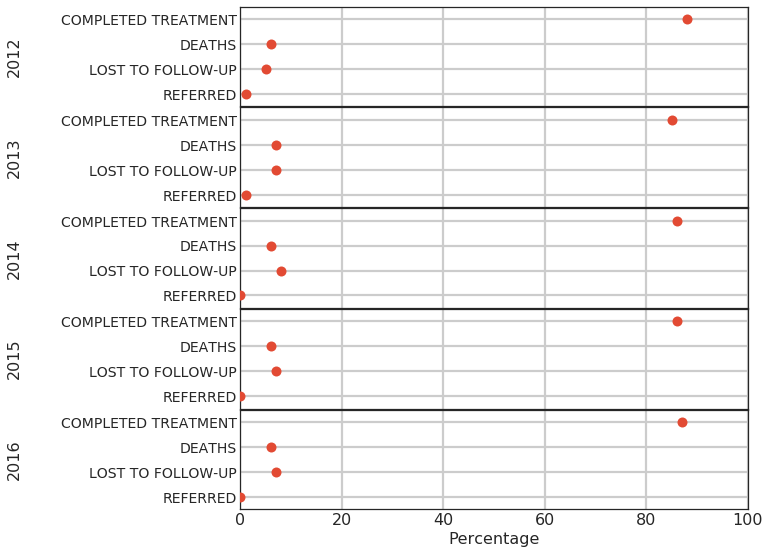

In [32]:
# Lets start with the missing basic data for pediatric and extrapulmonares cases: 
temp = datadf[(datadf.col_name.isin(["TOTAL"])) & 
       (datadf.table.isin(["Nuevos Pulmonares BK+", "Nuevos Pulmonares BK-", "Nuevos Pediatricos", 
                          "Nuevos Extrapulmonares", "Nuevos TB/VIH", "Retratamiento"])) &
       (datadf.deptocode!=0)].\
    groupby(["year", "row_name_B"]).value.sum().unstack(1)
temp["total"] = temp.sum(axis=1)
temp = temp.fillna(0)
temp = \
    (np.round(temp.divide(temp["total"] , axis="rows")*100, decimals=0))
temp = temp.stack().reset_index()[lambda x: x["row_name_B"] != "total"]
temp.columns = ["Year", "Outcome", "Percentage"]

grid = sb.FacetGrid(temp, row = "Year", aspect=7, size=1.5)
grid.map(sb.stripplot, "Percentage", "Outcome",  size=10) 
for ax in grid.axes: 
    ax[0].set_ylabel(ax[0].get_title()[-4:]+"\n\n")
    ax[0].set_title('')
    ax[0].grid(b = True, which="both", axis = "both", )
    ax[0].spines['top'].set_visible(True)
    ax[0].spines['right'].set_visible(True)
    ax[0].set_xlim(0,100)
grid.fig.tight_layout(pad=0.0, h_pad=0.1, w_pad=0.1, rect=(0,0,1,1) )

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


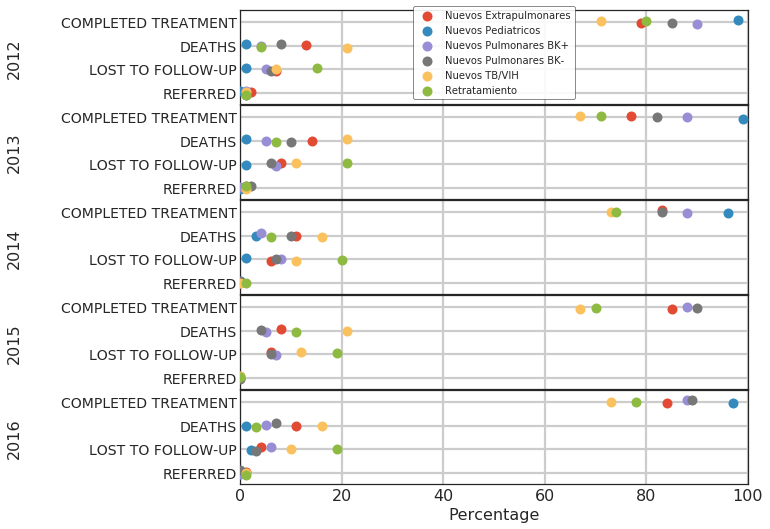

In [77]:
# Lets start with the missing basic data for pediatric and extrapulmonares cases: 
temp = datadf[(datadf.col_name.isin(["TOTAL"])) & 
       (datadf.table.isin(["Nuevos Pulmonares BK+", "Nuevos Pulmonares BK-", "Nuevos Pediatricos", 
                          "Nuevos Extrapulmonares", "Nuevos TB/VIH", "Retratamiento"])) &
       (datadf.deptocode!=0)].\
    groupby(["year", "table", "row_name_B"]).value.sum().unstack(2)
temp["total"] = temp.sum(axis=1)
temp = temp.fillna(0)
temp = \
    (np.round(temp.divide(temp["total"] , axis="rows")*100, decimals=0))
temp = temp.stack().reset_index()[lambda x: x["row_name_B"] != "total"]
temp.columns = ["Year", "TB Category", "Outcome", "Percentage"]

grid = sb.FacetGrid(temp, row = "Year", hue="TB Category", aspect=7, size=1.5)
grid.map(sb.stripplot, "Percentage", "Outcome",  size=10, jitter=True, dodge=True) 
for ax in grid.axes: 
    ax[0].set_ylabel(ax[0].get_title()[-4:]+"\n\n")
    ax[0].set_title('')
    ax[0].grid(b = True, which="both", axis = "both", )
    ax[0].spines['top'].set_visible(True)
    ax[0].spines['right'].set_visible(True)
    ax[0].set_xlim(0,100)
hs,ls = grid.axes[0][0].get_legend_handles_labels()
grid.axes[0][0].legend(hs[0:24:4], ls[0:24:4])
grid.fig.tight_layout(pad=0.0, h_pad=0.1, w_pad=0.1, rect=(0,0,1,1) )

row_name_B              COMPLETED TREATMENT  DEATHS  LOST TO FOLLOW-UP  \
table                                                                    
Nuevos Extrapulmonares               1164.0   159.0               91.0   
Nuevos Pediatricos                   1096.0    15.0               13.0   
Nuevos Pulmonares BK+                9494.0   511.0              698.0   
Nuevos Pulmonares BK-                1691.0   143.0              115.0   
Nuevos TB/VIH                         724.0   196.0              103.0   
Retratamiento                         619.0    52.0              156.0   

row_name_B              REFERRED    total  
table                                      
Nuevos Extrapulmonares      11.0   1425.0  
Nuevos Pediatricos           0.0   1124.0  
Nuevos Pulmonares BK+       38.0  10741.0  
Nuevos Pulmonares BK-       16.0   1965.0  
Nuevos TB/VIH                6.0   1029.0  
Retratamiento                5.0    832.0  


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


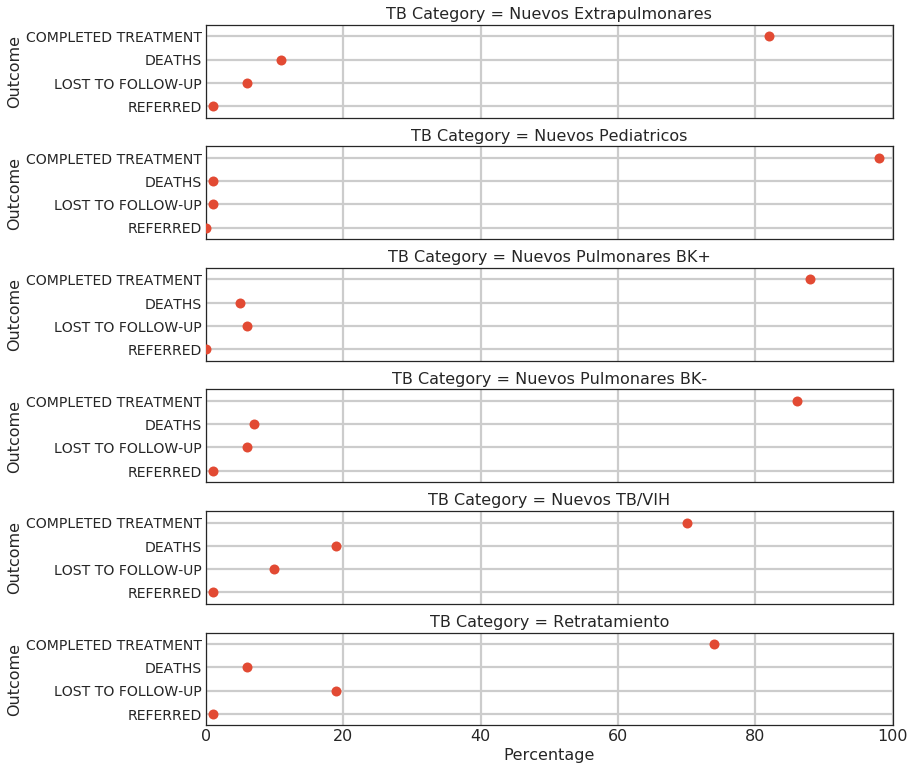

In [34]:
# Lets start with the missing basic data for pediatric and extrapulmonares cases: 
temp = datadf[(datadf.col_name.isin(["TOTAL"])) & 
       (datadf.table.isin(["Nuevos Pulmonares BK+", "Nuevos Pulmonares BK-", "Nuevos Pediatricos", 
                          "Nuevos Extrapulmonares", "Nuevos TB/VIH", "Retratamiento"])) &
       (datadf.deptocode!=0)].\
    groupby(["table", "row_name_B"]).value.sum(skipna=True).unstack(1).fillna(0)
temp["total"] = temp.sum(axis=1) 
print(temp)
temp = temp.fillna(0)
temp = \
    (np.round(temp.divide(temp["total"] , axis="rows")*100, decimals=0))
temp = temp.stack().reset_index()[lambda x: x["row_name_B"] != "total"]
temp.columns = ["TB Category", "Outcome", "Percentage"]

grid = sb.FacetGrid(temp, row = "TB Category", aspect=7, size=1.8)
grid.map(sb.stripplot, "Percentage", "Outcome",  size=10) 
for ax in grid.axes: 
    ax[0].grid(b = True, which="both", axis = "both", )
    ax[0].spines['top'].set_visible(True)
    ax[0].spines['right'].set_visible(True)
    ax[0].set_xlim(0,100)


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


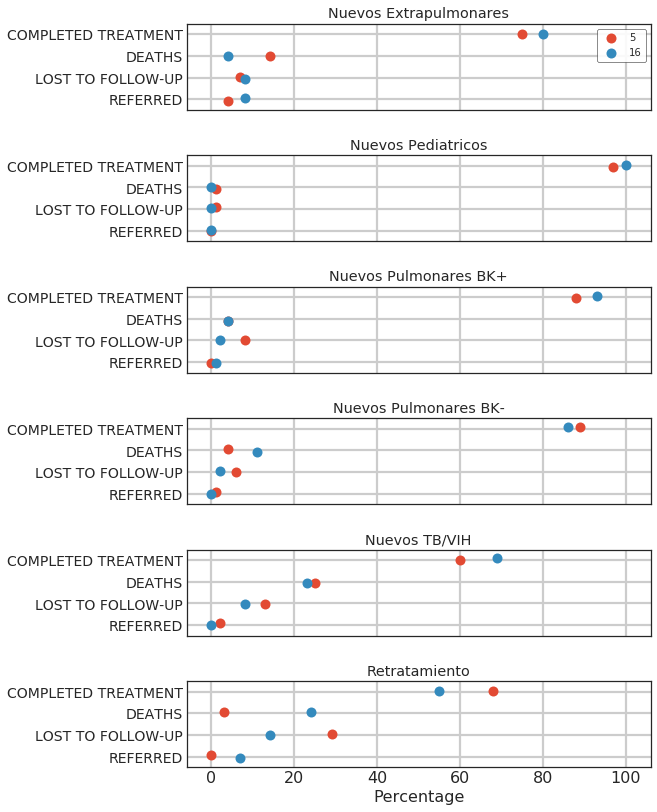

In [52]:
# Lets start with the missing basic data for pediatric and extrapulmonares cases: 
temp = datadf[(datadf.col_name.isin(["TOTAL"])) & 
       (datadf.table.isin(["Nuevos Pulmonares BK+", "Nuevos Pulmonares BK-", "Nuevos Pediatricos", 
                          "Nuevos Extrapulmonares", "Nuevos TB/VIH", "Retratamiento"])) &
       (datadf.deptocode.isin([16,5]) )].\
    groupby(["deptocode", "table", "row_name_B"]).value.sum().unstack(2)
temp["total"] = temp.sum(axis=1)
temp = temp.fillna(0)
temp = \
    (np.round(temp.divide(temp["total"] , axis="rows")*100, decimals=0))
temp = temp.stack().reset_index()[lambda x: x["row_name_B"] != "total"]
temp.columns = ["Depto", "TB Category", "Outflow condition", "Percentage"]

grid = sb.FacetGrid(temp, row = "TB Category", hue="Depto", aspect=5, size=1.9 )
grid.map(sb.stripplot, "Percentage", "Outflow condition", size=10, jitter = True)
for ax in grid.axes: 
    ax[0].set_ylabel('')
    ax[0].spines['top'].set_visible(True)
    ax[0].spines['right'].set_visible(True)
    ax[0].set_title(ax[0].get_title().split(" = ")[1])
    ax[0].grid(True)
hs,ls = grid.axes[0][0].get_legend_handles_labels()
grid.axes[0][0].legend([hs[0],hs[-1]], [ls[0],ls[-1]])

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


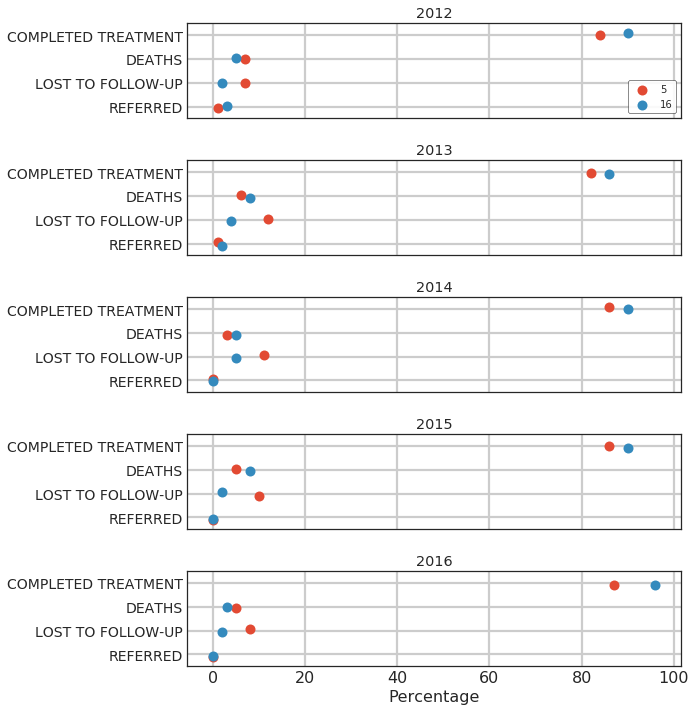

In [59]:
temp = datadf[(datadf.col_name.isin(["TOTAL"])) & 
       (datadf.table.isin(["Nuevos Pulmonares BK+", "Nuevos Pulmonares BK-", "Nuevos Pediatricos", 
                          "Nuevos Extrapulmonares", "Nuevos TB/VIH", "Retratamiento"])) &
       (datadf.deptocode.isin([16,5]) )].\
    groupby(["deptocode", "year", "row_name_B"]).value.sum().unstack(2)
temp["total"] = temp.sum(axis=1)
temp = temp.fillna(0)
temp = \
    (np.round(temp.divide(temp["total"] , axis="rows")*100, decimals=0))
temp = temp.stack().reset_index()[lambda x: x["row_name_B"] != "total"]
temp.columns = ["Depto", "Year", "Outflow condition", "Percentage"]

grid = sb.FacetGrid(temp, row = "Year", hue="Depto", aspect=5, size=2)
grid.map(sb.stripplot, "Percentage", "Outflow condition", size=10, jitter = True)
for ax in grid.axes: 
    ax[0].set_ylabel('')
    ax[0].spines['top'].set_visible(True)
    ax[0].spines['right'].set_visible(True)
    ax[0].set_title(ax[0].get_title().split(" = ")[1])
    ax[0].grid(True)
hs,ls = grid.axes[0][0].get_legend_handles_labels()
grid.axes[0][0].legend([hs[0],hs[-1]], [ls[0],ls[-1]])

Text(0.5,1,'TB treatment cohort\nCompleted treatment %')

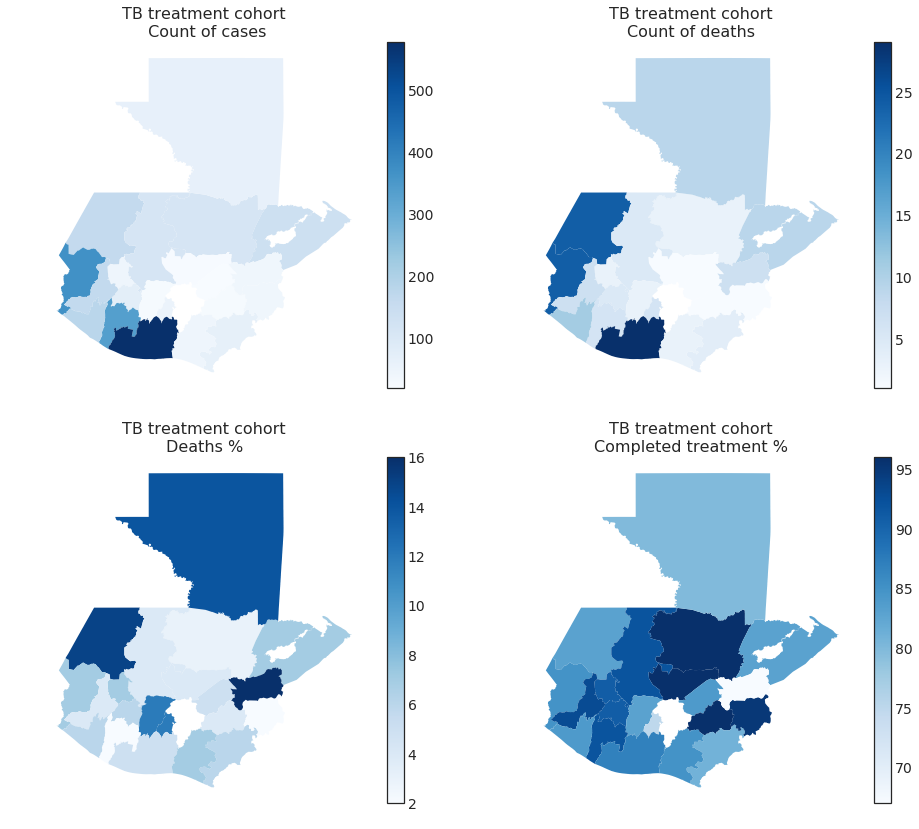

In [69]:
temp = datadf[(datadf.col_name.isin(["TOTAL"])) & 
       (datadf.table.isin([
           "Nuevos Pulmonares BK+", "Nuevos Pulmonares BK-", "Nuevos Pediatricos", 
           "Nuevos Extrapulmonares", 
           "Nuevos TB/VIH", "Retratamiento"])) &
       (datadf.deptocode!=0) & (datadf.year == 2016)].\
    groupby(["deptocode", "year", "row_name_B"]).value.sum().unstack(2)
temp["total"] = temp.sum(axis=1)
temp = temp.fillna(0)
temp2 = \
    (np.round(temp.divide(temp["total"] , axis="rows")*100, decimals=0)).reset_index()
#temp = temp.stack().reset_index()[lambda x: x["row_name_"] != "total"]
temp2["deptocode"]= (temp2.deptocode * 100).astype(str) 

f, axes = plt.subplots(2, 2, figsize=(16, 14))
ax = axes[0][0]
deptos.merge(temp["total"].reset_index()\
             .assign(deptocode = lambda x: (x.deptocode*100).astype(str)), 
             left_on="CODIGO", right_on = "deptocode" ).plot("total", cmap = "Blues", legend=True, ax= ax)
ax.axis('off')
ax.set_title("TB treatment cohort\n Count of cases")

ax = axes[0][1]
deptos.merge(temp.reset_index()\
             .assign(deptocode = lambda x: (x.deptocode*100).astype(str)), 
             left_on="CODIGO", right_on = "deptocode" ).plot("DEATHS", cmap = "Blues", 
                                                             legend=True, ax= ax)
ax.axis('off')
ax.set_title("TB treatment cohort\nCount of deaths")

ax = axes[1][0]
deptos.merge(temp2, 
             left_on="CODIGO", right_on = "deptocode" ).plot("DEATHS", cmap = "Blues", 
                                                             legend=True, ax= ax)
ax.axis('off')
ax.set_title("TB treatment cohort\nDeaths %")

ax = axes[1][1]
deptos.merge(temp2, 
             left_on="CODIGO", right_on = "deptocode" ).plot("COMPLETED TREATMENT", cmap = "Blues", 
                                                             legend=True, ax= ax)
ax.axis('off')
ax.set_title("TB treatment cohort\nCompleted treatment %")


Text(0.5,1,'TB treatment cohort\nCompleted treatment %')

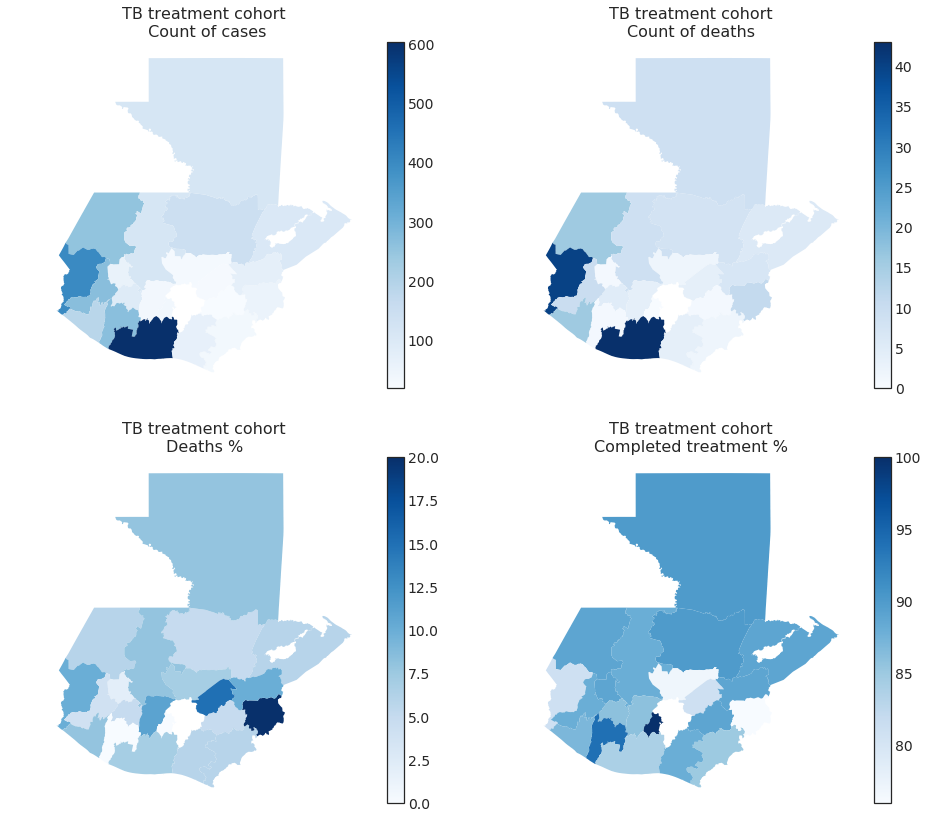

In [70]:
temp = datadf[(datadf.col_name.isin(["TOTAL"])) & 
       (datadf.table.isin([
           "Nuevos Pulmonares BK+", "Nuevos Pulmonares BK-", "Nuevos Pediatricos", 
           "Nuevos Extrapulmonares", 
           "Nuevos TB/VIH", "Retratamiento"])) &
       (datadf.deptocode!=0) & (datadf.year == 2012)].\
    groupby(["deptocode", "year", "row_name_B"]).value.sum().unstack(2)
temp["total"] = temp.sum(axis=1)
temp = temp.fillna(0)
temp2 = \
    (np.round(temp.divide(temp["total"] , axis="rows")*100, decimals=0)).reset_index()
#temp = temp.stack().reset_index()[lambda x: x["row_name_"] != "total"]
temp2["deptocode"]= (temp2.deptocode * 100).astype(str) 

f, axes = plt.subplots(2, 2, figsize=(16, 14))
ax = axes[0][0]
deptos.merge(temp["total"].reset_index()\
             .assign(deptocode = lambda x: (x.deptocode*100).astype(str)), 
             left_on="CODIGO", right_on = "deptocode" ).plot("total", cmap = "Blues", legend=True, ax= ax)
ax.axis('off')
ax.set_title("TB treatment cohort\n Count of cases")

ax = axes[0][1]
deptos.merge(temp.reset_index()\
             .assign(deptocode = lambda x: (x.deptocode*100).astype(str)), 
             left_on="CODIGO", right_on = "deptocode" ).plot("DEATHS", cmap = "Blues", 
                                                             legend=True, ax= ax)
ax.axis('off')
ax.set_title("TB treatment cohort\nCount of deaths")

ax = axes[1][0]
deptos.merge(temp2, 
             left_on="CODIGO", right_on = "deptocode" ).plot("DEATHS", cmap = "Blues", 
                                                             legend=True, ax= ax)
ax.axis('off')
ax.set_title("TB treatment cohort\nDeaths %")

ax = axes[1][1]
deptos.merge(temp2, 
             left_on="CODIGO", right_on = "deptocode" ).plot("COMPLETED TREATMENT", cmap = "Blues", 
                                                             legend=True, ax= ax)
ax.axis('off')

ax.set_title("TB treatment cohort\nCompleted treatment %")


In [219]:
def year_cohort_plot(group0 = "year", group1 = "row_name_B", 
                     data_filter = None, hue = None,
                     transpose_titles = False,
                     palette = "Set2", aspect = 6):
    # Lets start with the missing basic data for pediatric and extrapulmonares cases: 
    groups = [group0, group1]
    if hue is not None:
        groups = groups + [hue]

    temp = datadf[(datadf.col_name.isin(["TOTAL"])) & 
           (datadf.table.isin(["Nuevos Pulmonares BK+", "Nuevos Pulmonares BK-", "Nuevos Pediatricos", 
                               "Nuevos Extrapulmonares", "Nuevos TB/VIH", "Retratamiento"])) &
           (data_filter if data_filter is not None else True)].\
        groupby(groups).value.sum().unstack(1)
    temp["total"] = temp.sum(axis=1)
    output = "Counts\n" + str(temp)
    temp = temp.fillna(0)
    temp = \
        (np.round(temp.divide(temp["total"] , axis="rows")*100, decimals=1))
    output += "\nPercentages\n"  + str(temp)
    
    temp = temp.stack().reset_index()[lambda x: x[group1] != "total"]
    temp.columns = ["Group0", "Group1", "Percentage"] if hue is None else \
                        ["Group0", "Hue", "Group1", "Percentage"]
    grid = sb.FacetGrid(temp, row = "Group0", # hue = None if hue is None else "Hue", 
                        aspect=aspect, size=2.0 if hue is not None else 1.4)
    grid.map(sb.stripplot, "Percentage", "Group1", "Hue", 
             palette = palette, dodge = True, size=8, linewidth=0.5)
    for ax in grid.axes:  #sb.stripplot()
        title = ax[0].get_title().split(" = ")[1]
        if transpose_titles:
            ax[0].set_ylabel(title)
            ax[0].set_title('')
        else:
            ax[0].set_title(title)
            ax[0].set_ylabel('')
        ax[0].grid(b = True, which="both", axis = "both", )
        ax[0].spines['top'].set_visible(True)
        ax[0].spines['right'].set_visible(True)
        ax[0].set_xlim(0,100)
    if hue is not None:
        hs,ls = grid.axes[0][0].get_legend_handles_labels()
        interval = len(temp.Hue.unique())
        grid.fig.legend( hs[0:interval], ls[0:interval])
    return grid, output

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:708: UserWarning: Using the stripplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


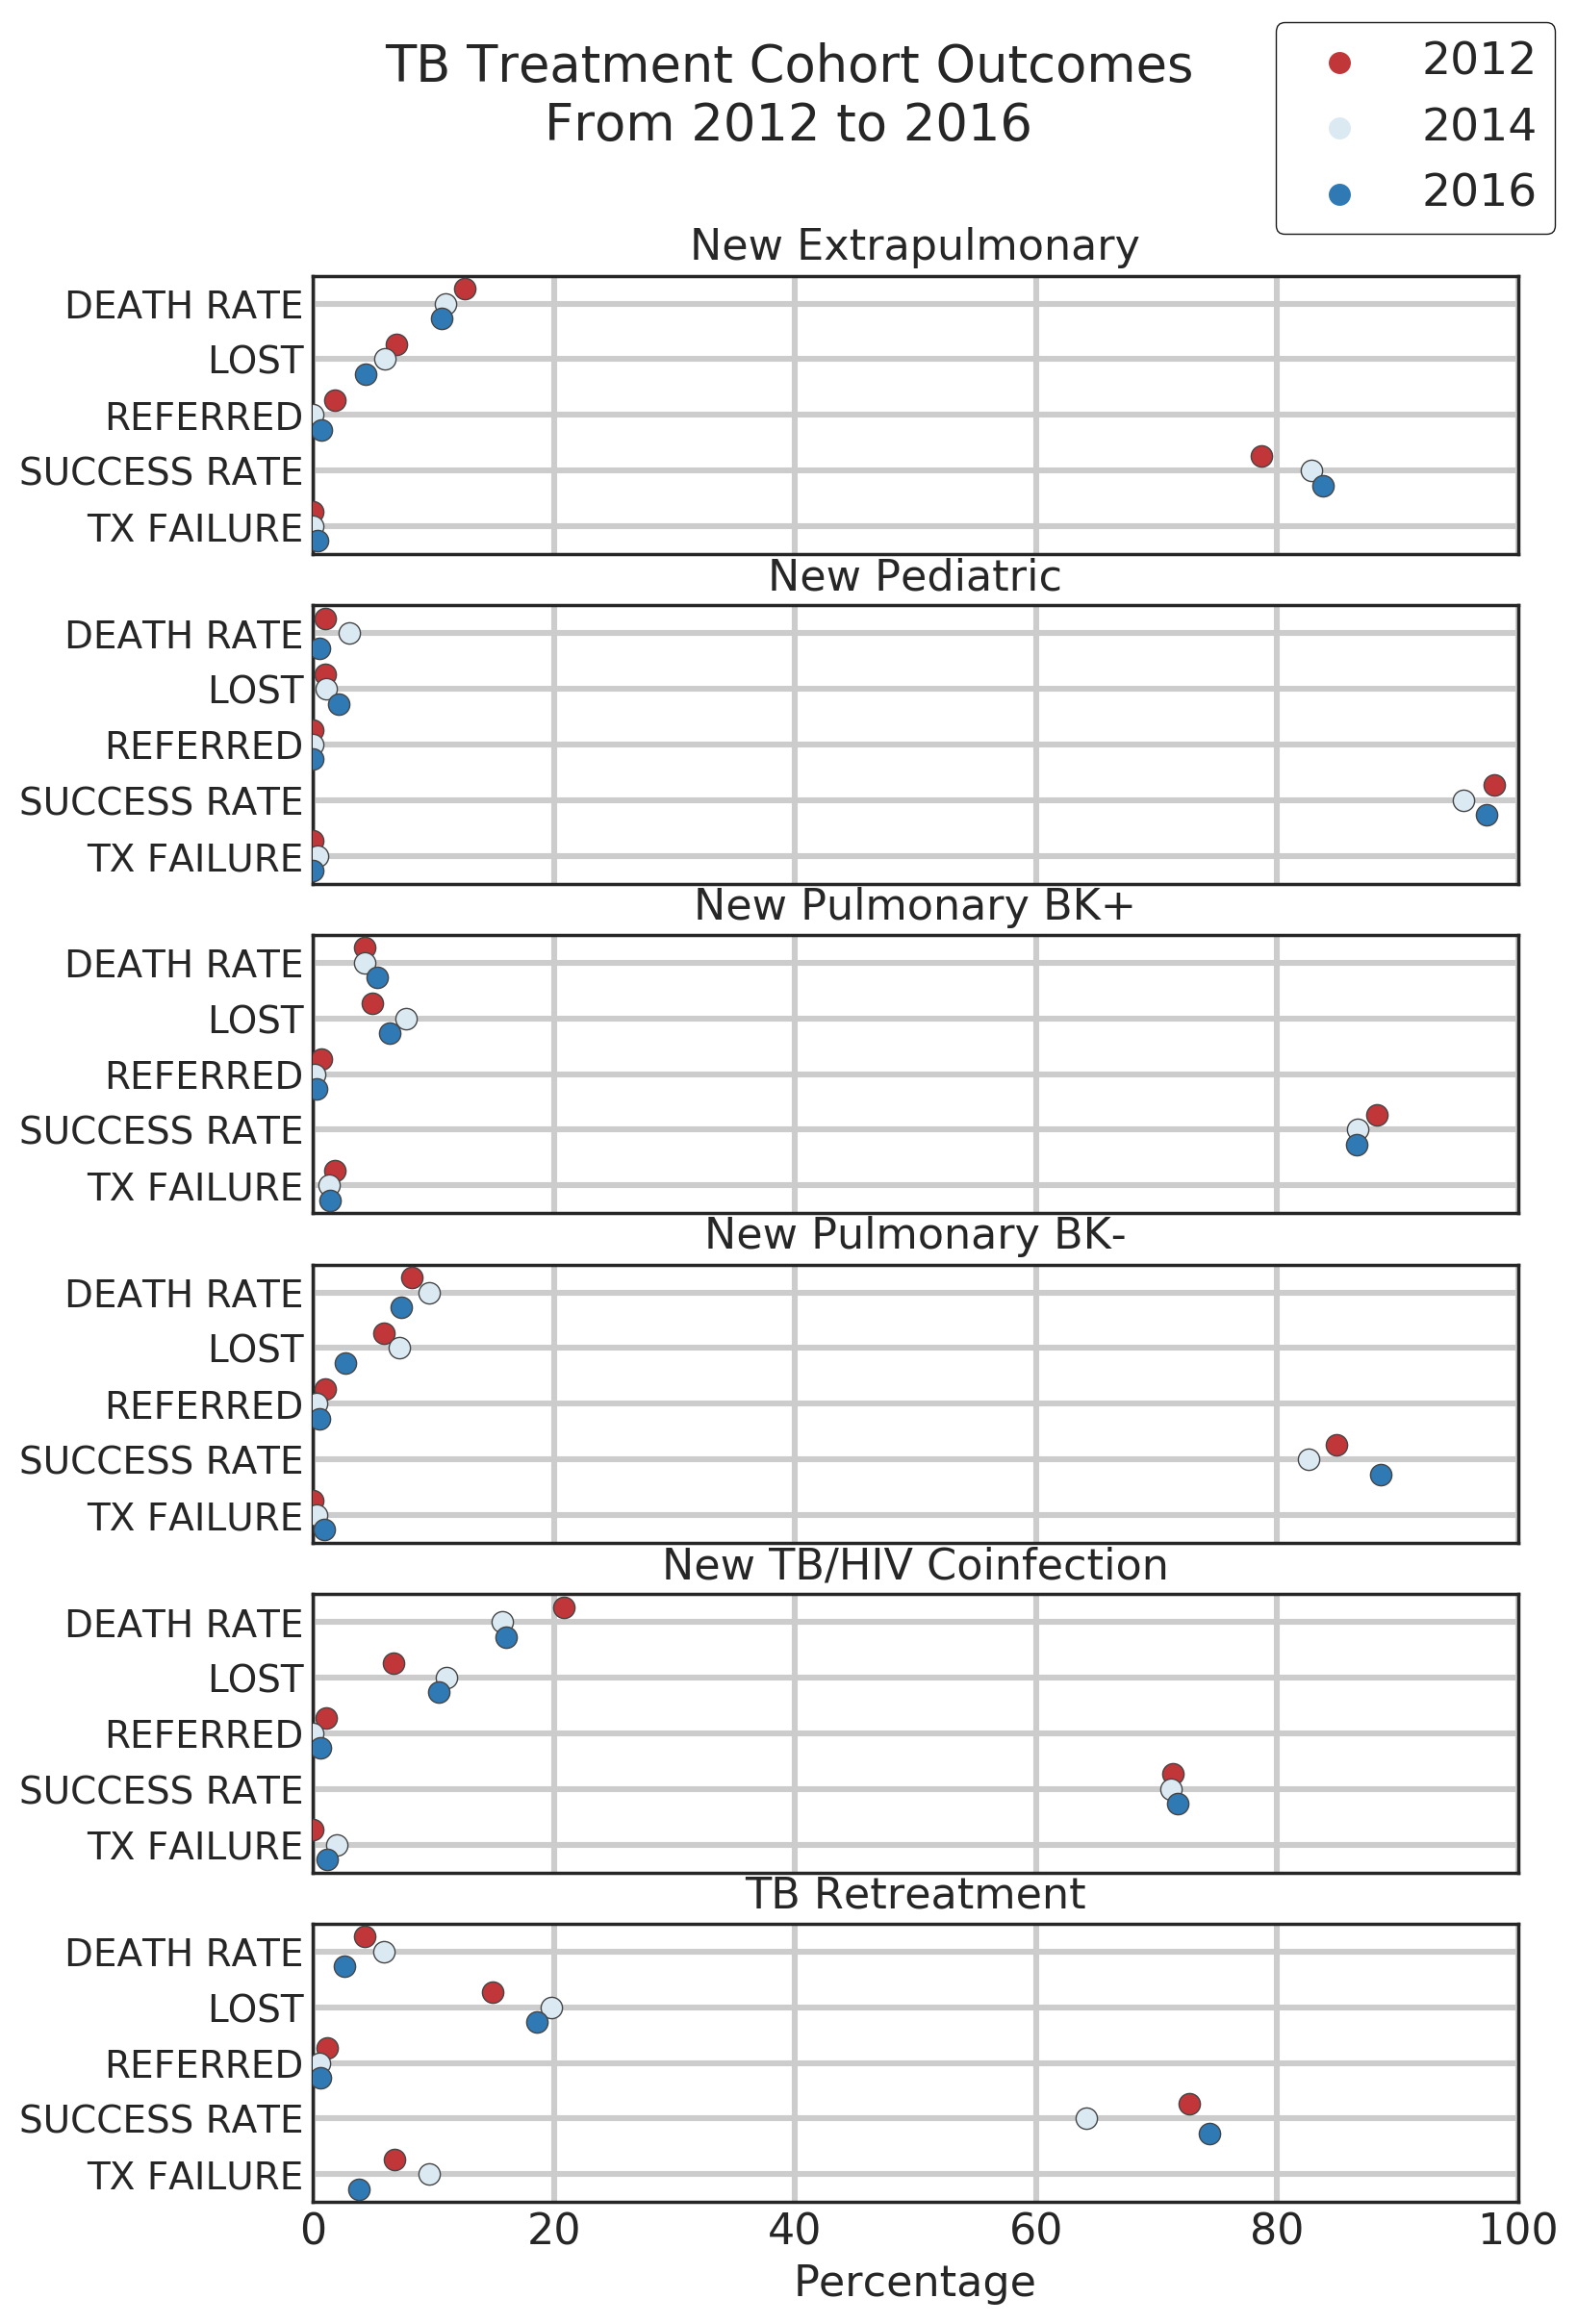

In [227]:
datadf["row_name_C"] = datadf.row_name.map(lambda x: \
        "LOST"  if x in ["ABANDONO/PERDIDA_SEGM"]\
        else "SUCCESS RATE" if x in ["CURADOS", "TRATAMIENTOS_COMPLETOS", 
                                 "TRATAMIENTOS COMPLETOS"] \
        else "TX FAILURE" if x == "FRACASO_TERAPEUTICO" \
        else "REFERRED" if x in ["TRANSFERIDOS", "TRASLADOS"] \
        else "DEATH RATE" if x == "FALLECIDOS" \
         else x)
datadf["eng_table"] = datadf.table.replace({
    "Nuevos Extrapulmonares": "New Extrapulmonary",
    "Nuevos Pediatricos":"New Pediatric",
    "Nuevos Pulmonares BK+": "New Pulmonary BK+",
    "Nuevos Pulmonares BK-": "New Pulmonary BK-",
    "Nuevos TB/VIH": "New TB/HIV Coinfection",
    "Retratamiento": "TB Retreatment"
})
palette = sb.color_palette("RdBu")
grid, output1 = year_cohort_plot(data_filter = (datadf.deptocode!=0)&(datadf.year.isin([2012, 2014, 2016])), 
                                 group0="eng_table", hue = "year", group1 = "row_name_C",
                                 palette = {
                                     2012: palette[0],
                                     2014: palette[3],
                                     2016: palette[5]
                                 },
                                transpose_titles = False,
                                aspect = 4)
grid.fig.suptitle("TB Treatment Cohort Outcomes\nFrom 2012 to 2016")
grid.fig.tight_layout(pad=0.0, h_pad=0.1, w_pad=0.1, rect=[0,0,1,0.9])
#print(output1)

Text(0.5,1,'TB Treatment success rate\nfor TB/HIV ')

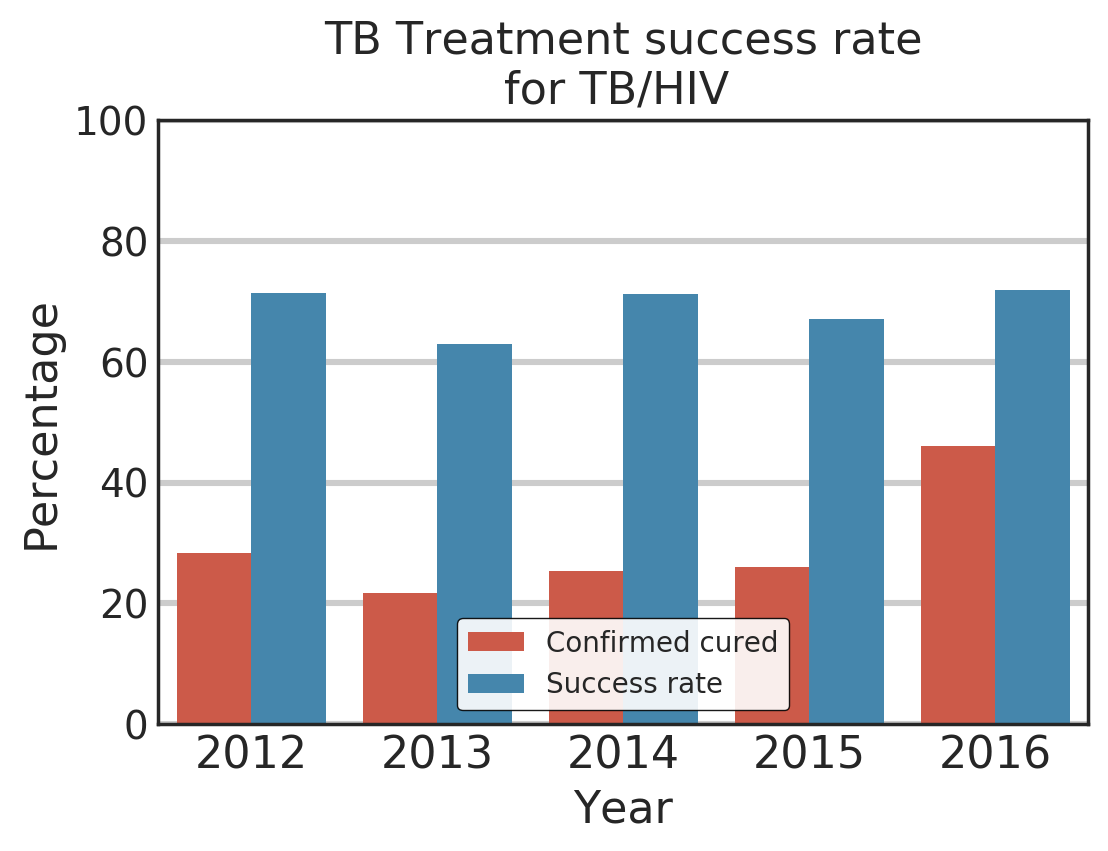

In [224]:
temp = datadf[(datadf.col_name.isin(["TOTAL"])) & 
       (datadf.table.isin([#"Nuevos Pulmonares BK+", "Nuevos Pulmonares BK-", "Nuevos Pediatricos", 
                           #"Nuevos Extrapulmonares", 
                           "Nuevos TB/VIH"])) &
       (datadf.deptocode!=0)].\
    groupby(["year", "row_name"]).value.sum().unstack(1)
temp["total"] = temp.sum(axis=1)
output = "Counts\n" + str(temp)
temp = temp.fillna(0)
temp = \
    (np.round(temp.divide(temp["total"] , axis="rows")*100, decimals=1))
output += "\nPercentages\n"  + str(temp)

temp = temp[["CURADOS", "TRATAMIENTOS COMPLETOS", "total"]]
temp.columns = ["Confirmed cured", "Presumably cured", "total"]
temp["Success rate"]= temp["Presumably cured"] + temp["Confirmed cured"]
#temp.stack().reset_index()
temp = temp.stack().reset_index()[lambda x: x["level_1"].isin(["Success rate", "Confirmed cured"])]
temp.columns = ["Year", "Category", "Percentage"]
plt.rcParams["legend.fontsize"] = 7
sb.barplot("Year", "Percentage", "Category", temp, dodge=True, hue_order=["Confirmed cured", "Success rate"], )
plt.legend(loc = "lower center", fontsize=10)
plt.ylim(0,100)
plt.title("TB Treatment success rate\nfor TB/HIV ")


In [190]:
temp = datadf[(datadf.col_name.isin(["TOTAL"])) & 
       (datadf.table.isin(["Nuevos Pulmonares BK+", "Nuevos Pulmonares BK-", "Nuevos Pediatricos", 
                           "Nuevos Extrapulmonares", 
                           "Nuevos TB/VIH", "Nuevos Extrapulmonares Pediatricos"])) &
       (datadf.deptocode!=0)].\
    groupby(["year", "table"]).value.sum()
temp

year  table                             
2012  Nuevos Extrapulmonares                 277.0
      Nuevos Pediatricos                     393.0
      Nuevos Pulmonares BK+                 2155.0
      Nuevos Pulmonares BK-                  392.0
      Nuevos TB/VIH                          269.0
2013  Nuevos Extrapulmonares                 287.0
      Nuevos Pediatricos                     273.0
      Nuevos Pulmonares BK+                 2151.0
      Nuevos Pulmonares BK-                  373.0
      Nuevos TB/VIH                          226.0
2014  Nuevos Extrapulmonares                 281.0
      Nuevos Extrapulmonares Pediatricos      47.0
      Nuevos Pediatricos                     264.0
      Nuevos Pulmonares BK+                 1999.0
      Nuevos Pulmonares BK-                  333.0
      Nuevos TB/VIH                          198.0
2015  Nuevos Extrapulmonares                 308.0
      Nuevos Pulmonares BK+                 2154.0
      Nuevos Pulmonares BK-              

1 Guatemala


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


2 Progreso


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


3 Sacatepéquez


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


4 Chimaltenango


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


5 Escuintla


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


6 Santa Rosa


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


7 Sololá


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


8 Totonicapán


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


9 Quetzaltenango


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


10 Suchitepéquez


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


11 Retalhuleu


/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


12 San Marcos


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


13 Huehuetenango


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


14 Quiché


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


15 Baja Verapaz


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


16 Alta Verapaz


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


17 Petén


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


18 Izabal


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


19 Zacapa


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


20 Chiquimula


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


21 Jalapa


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


22 Jutiapa


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


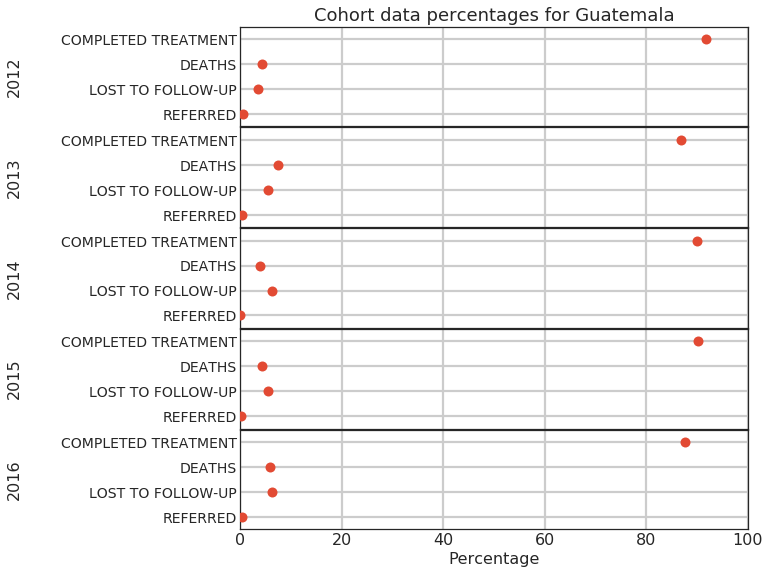

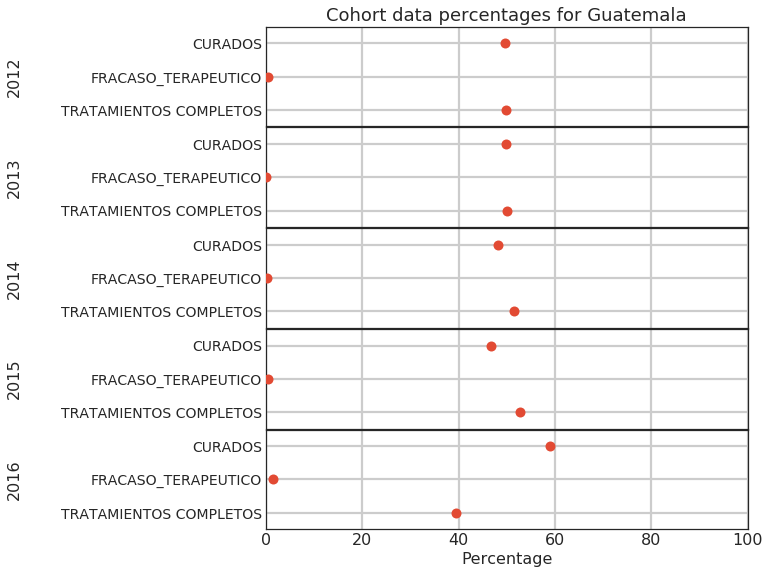

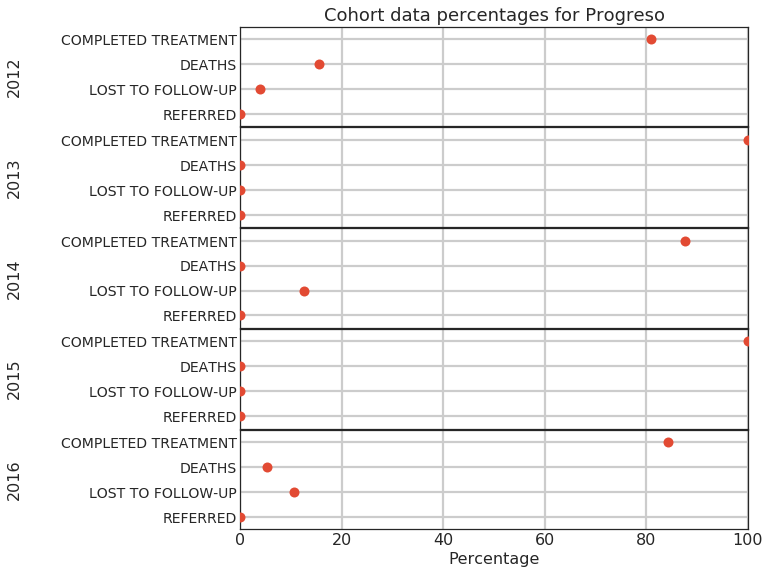

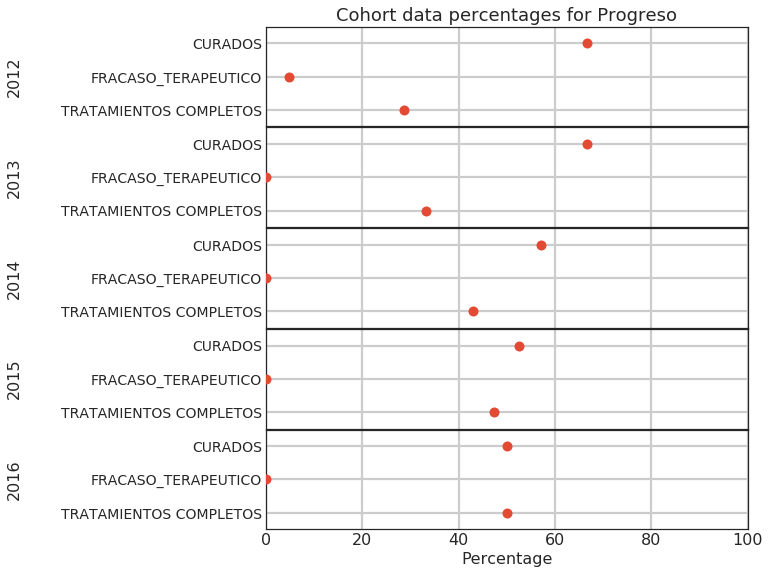

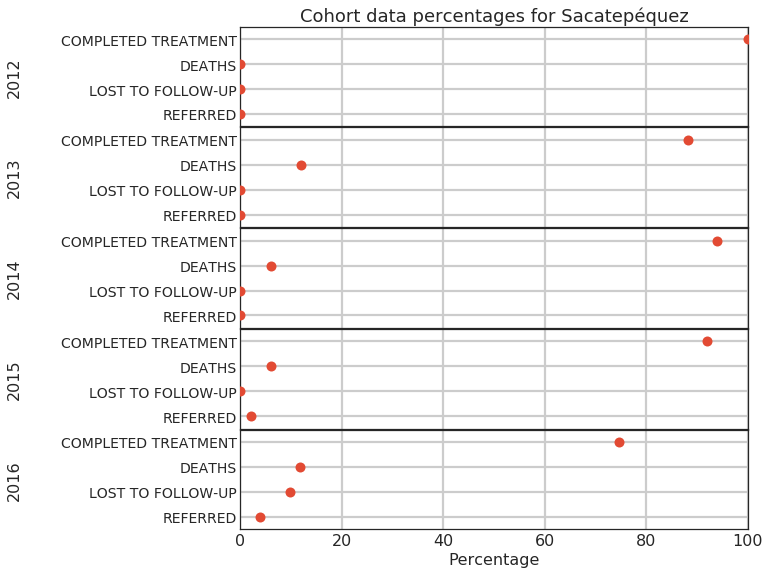

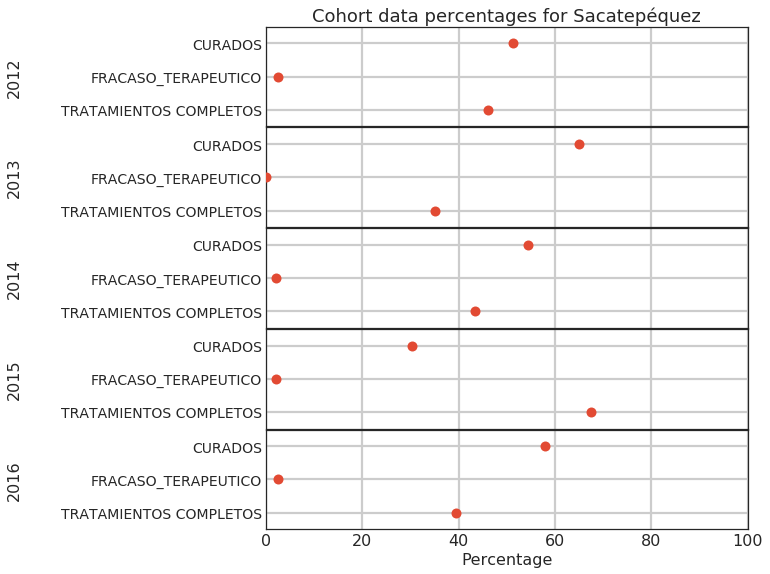

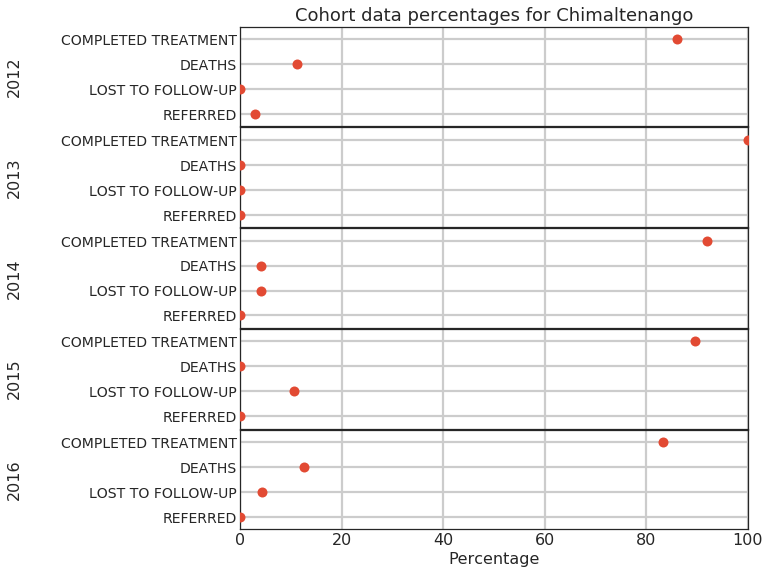

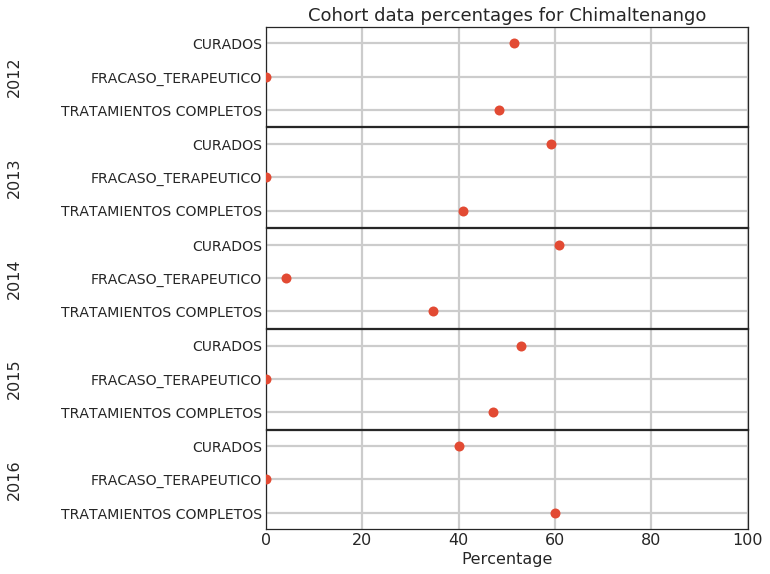

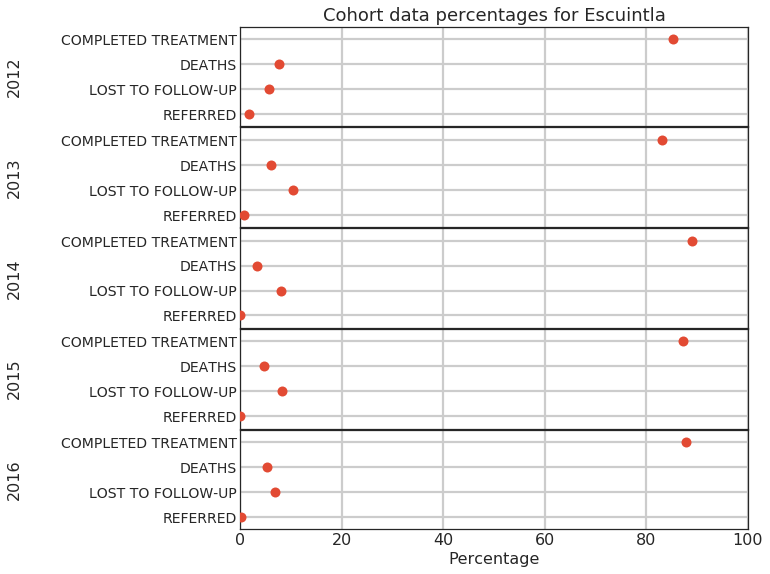

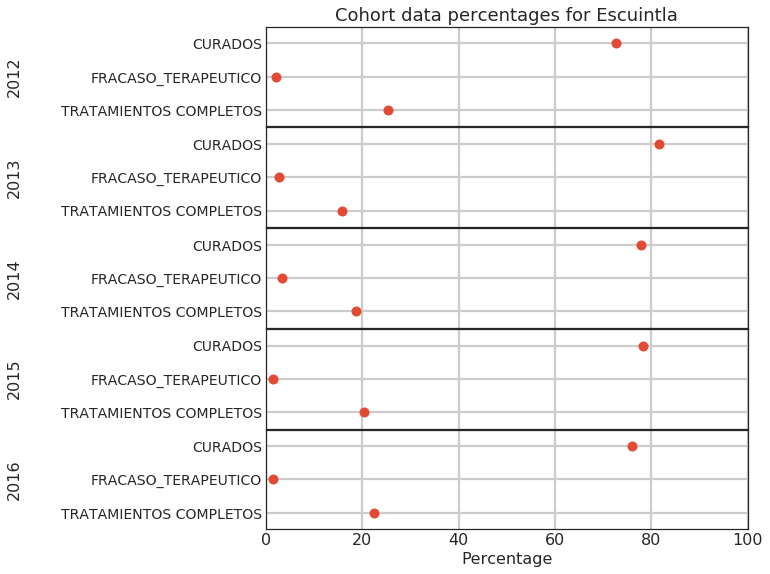

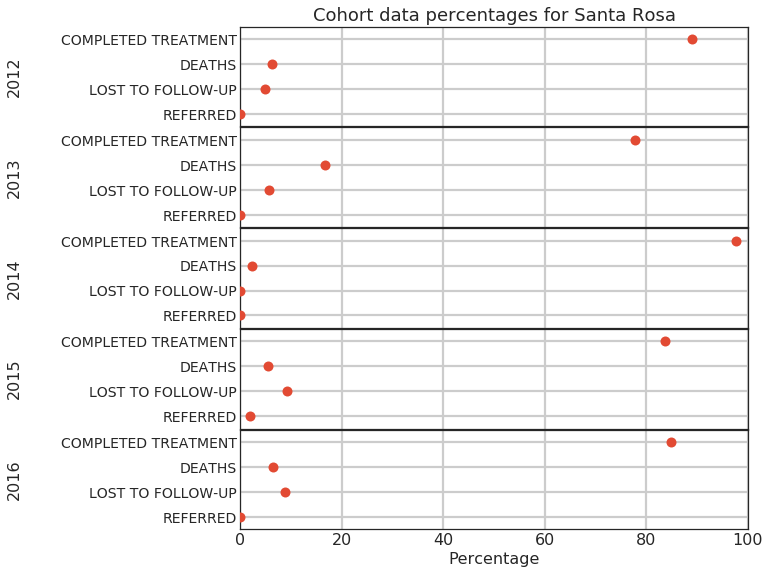

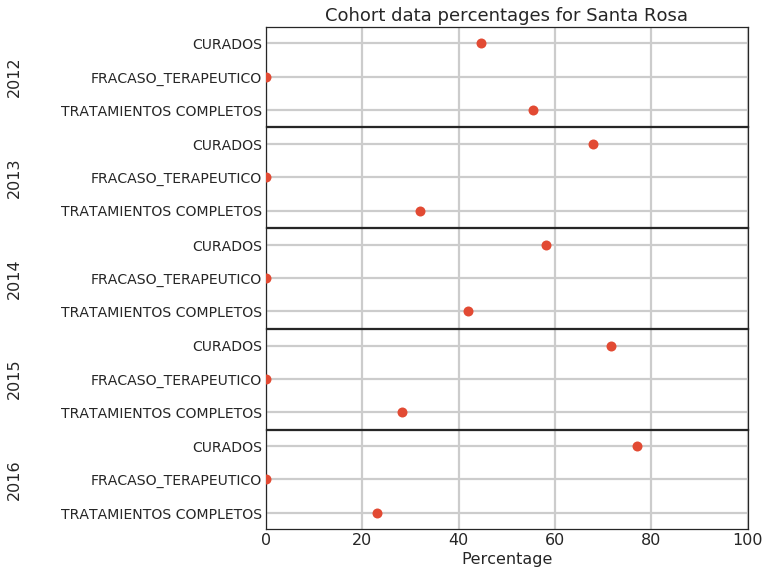

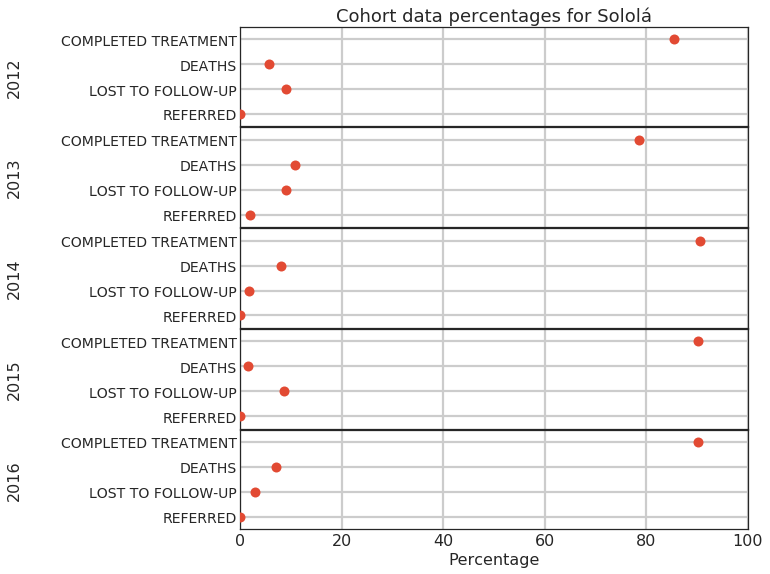

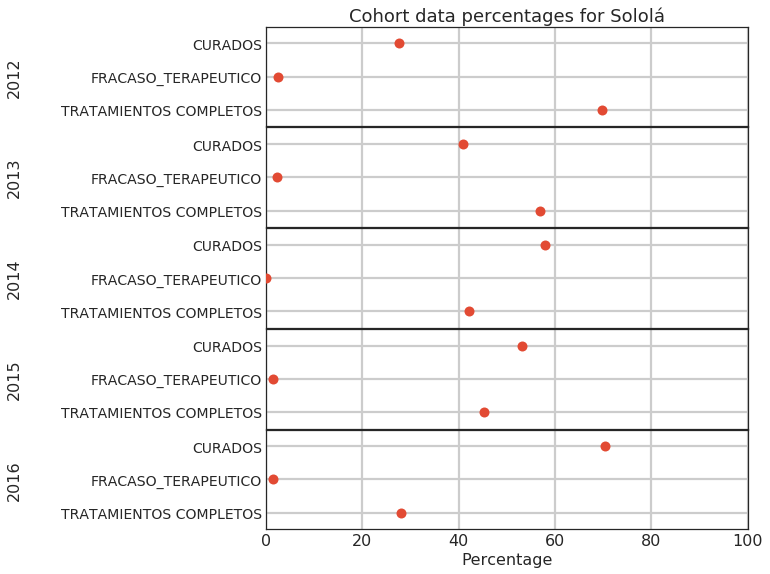

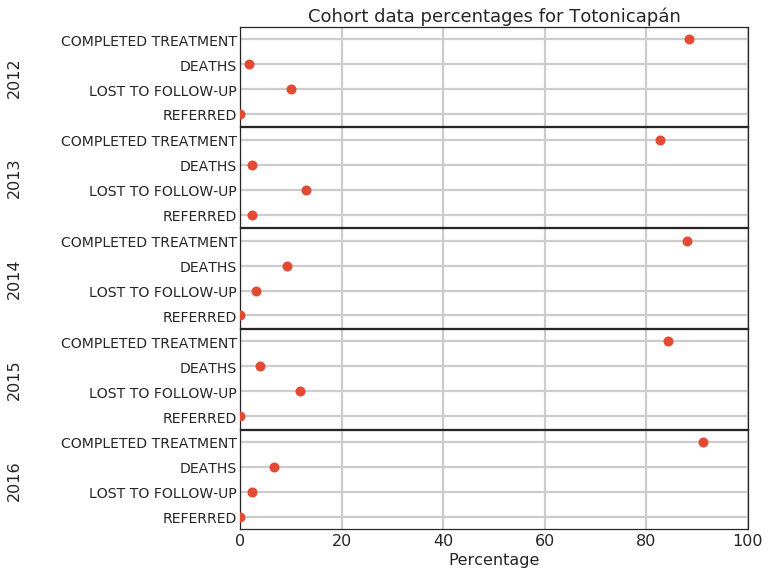

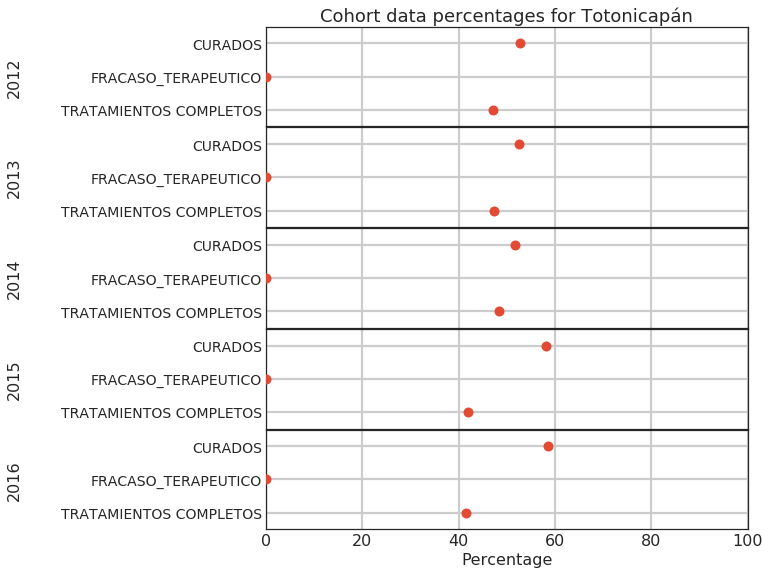

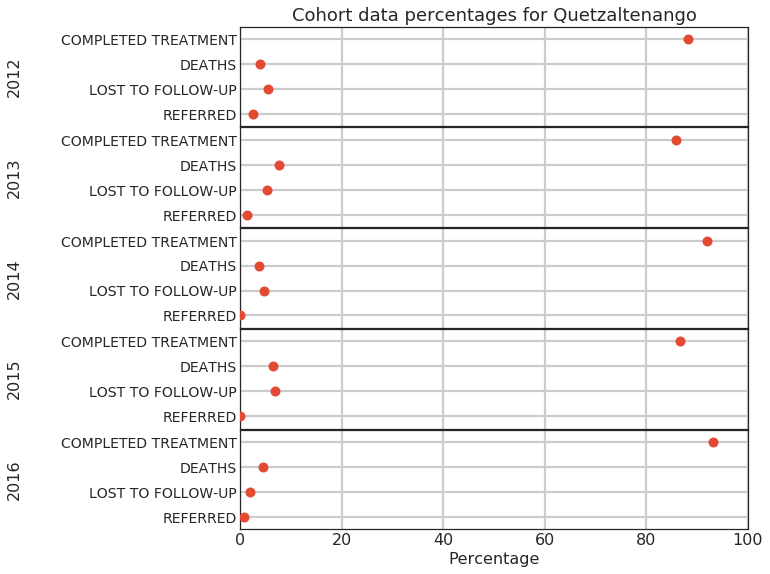

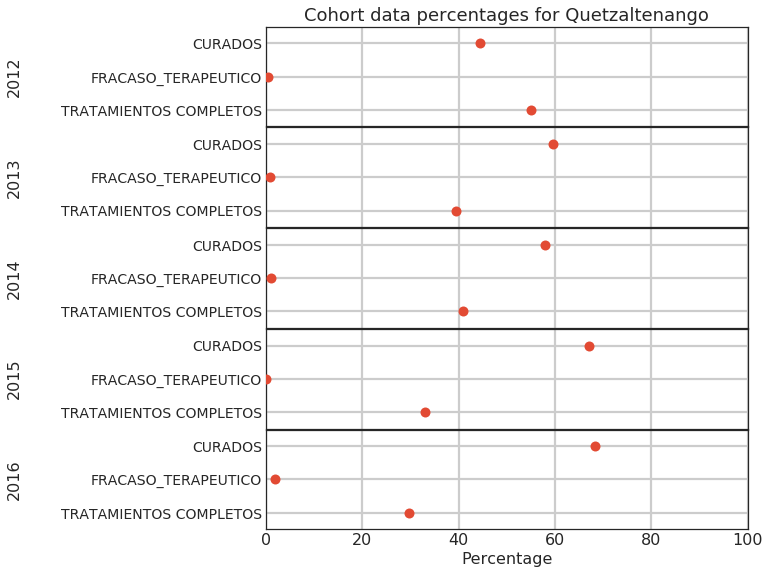

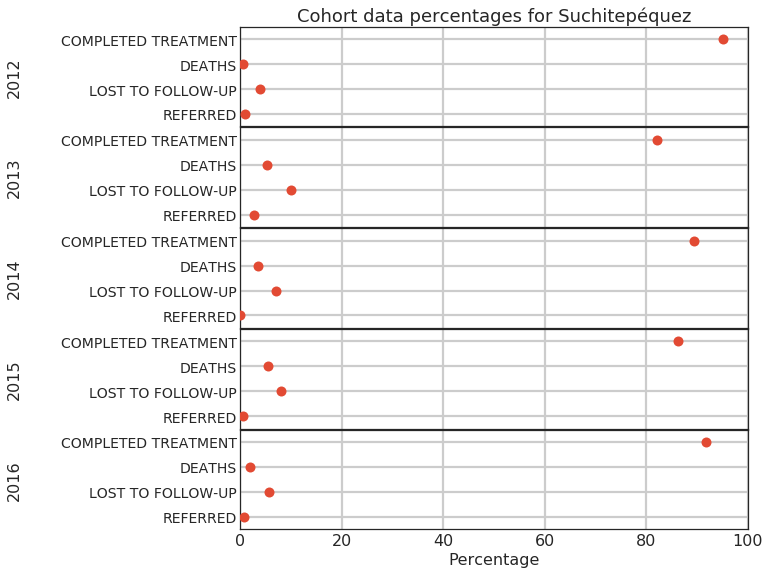

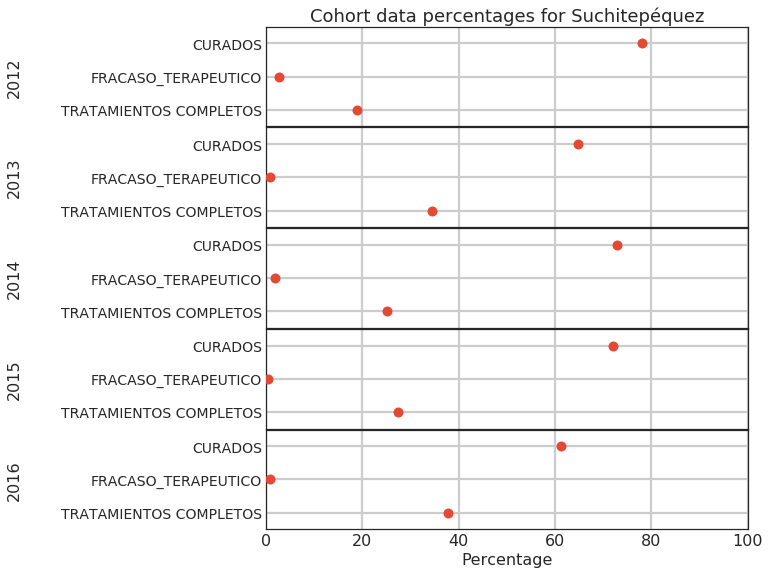

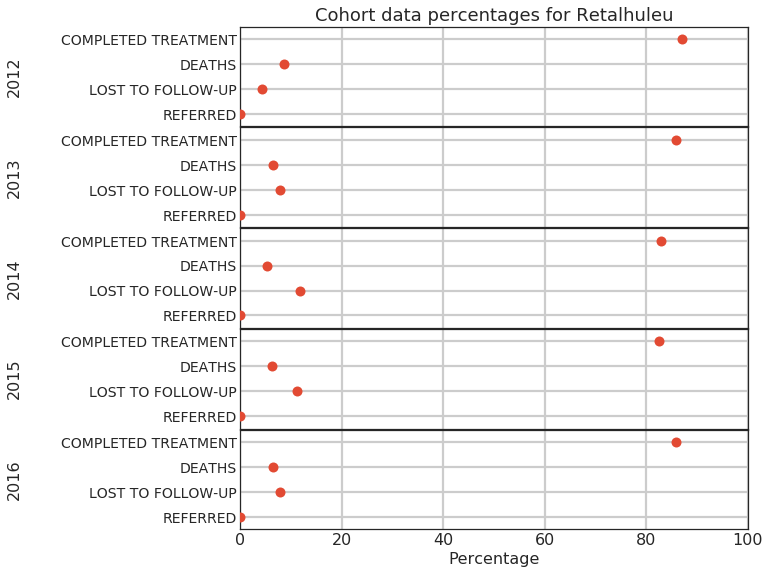

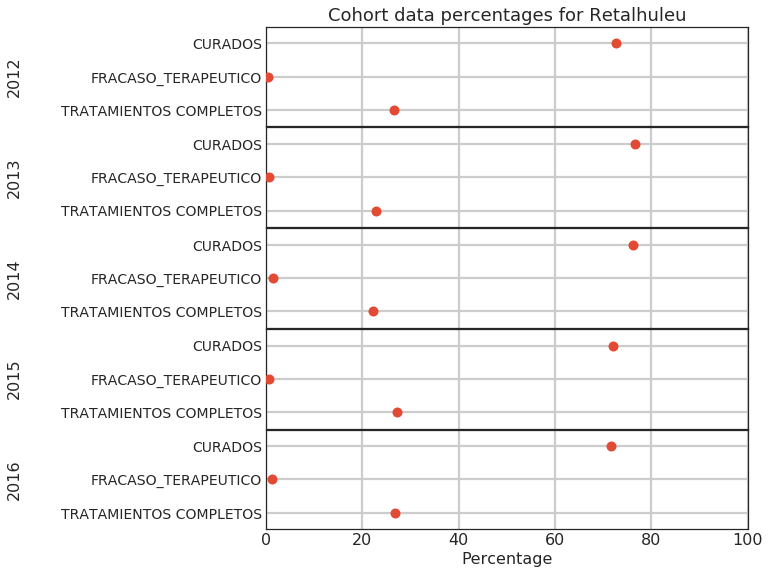

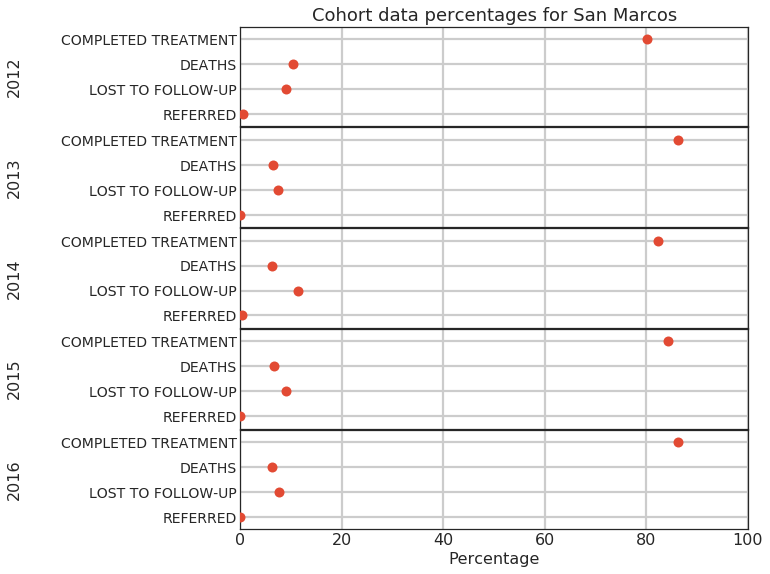

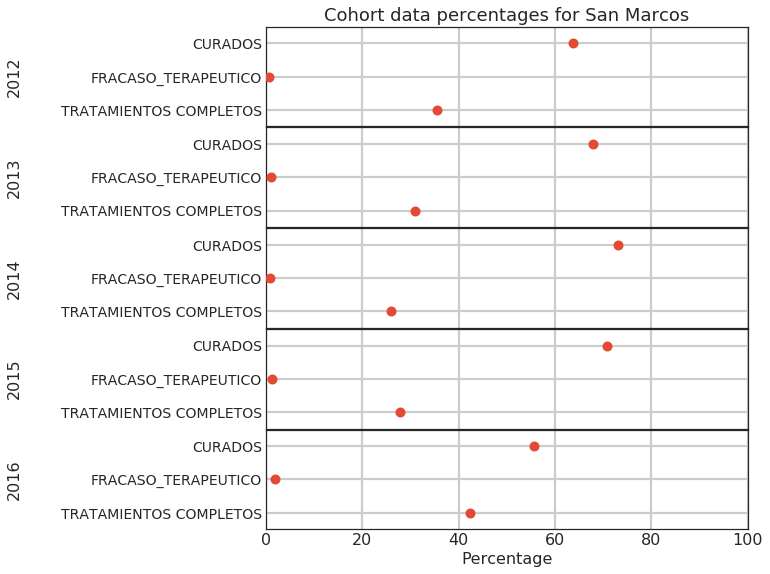

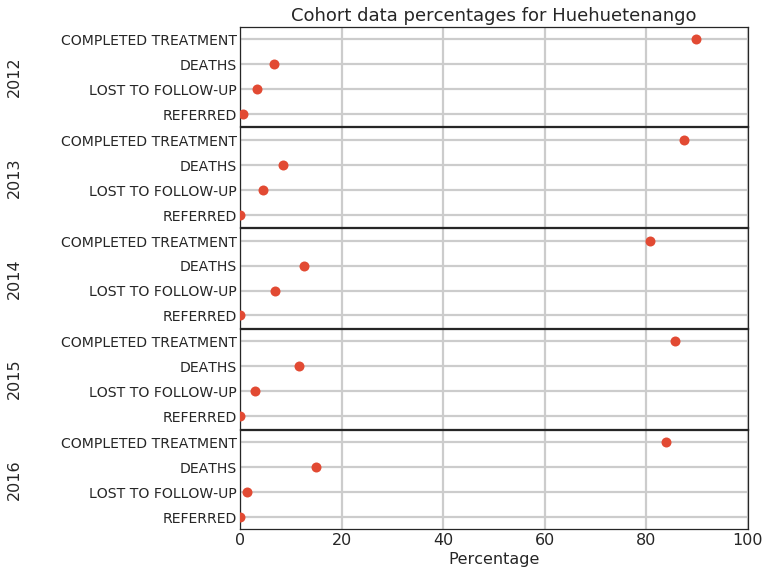

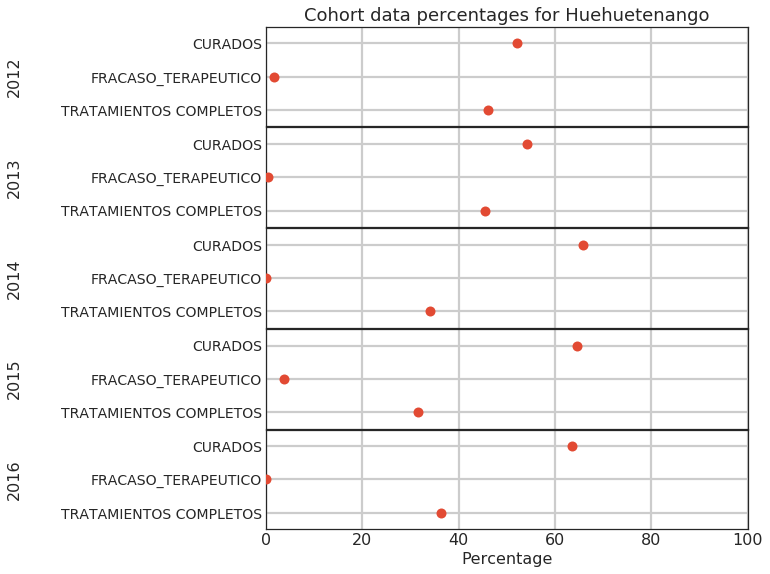

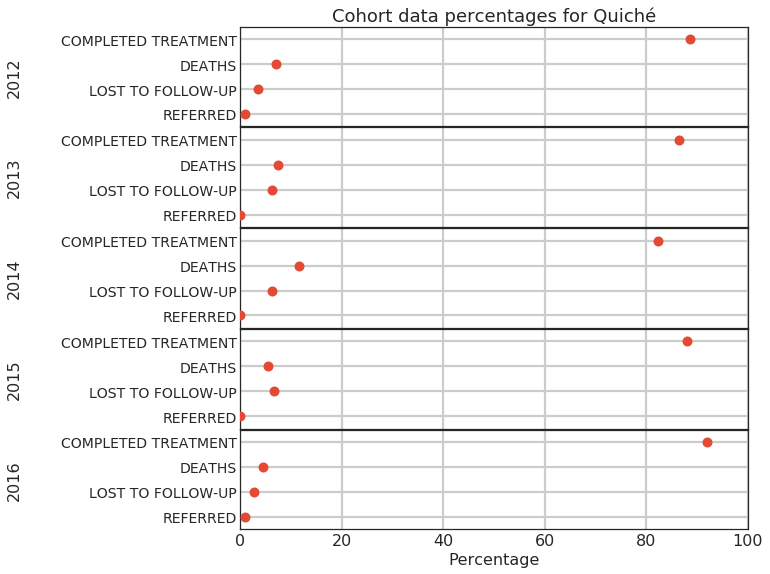

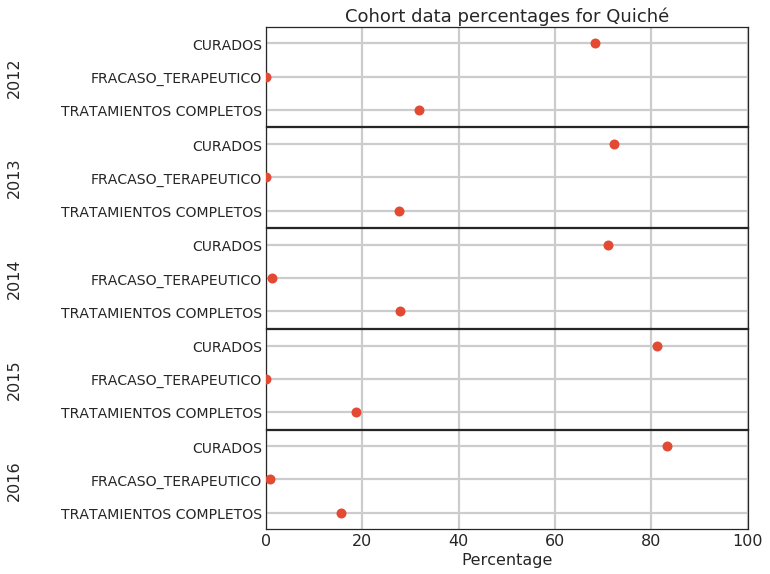

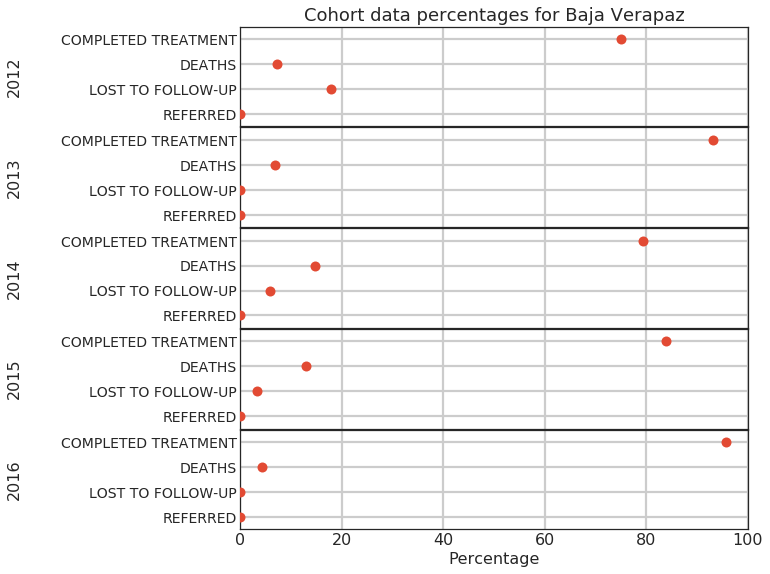

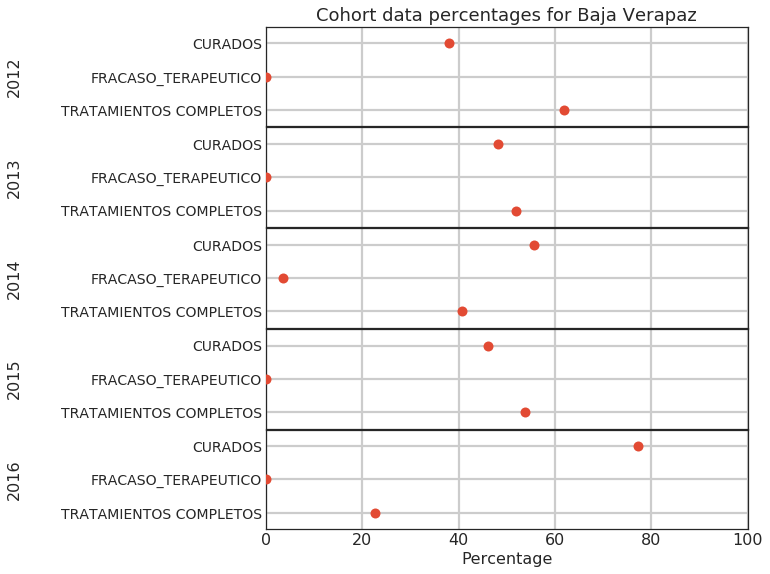

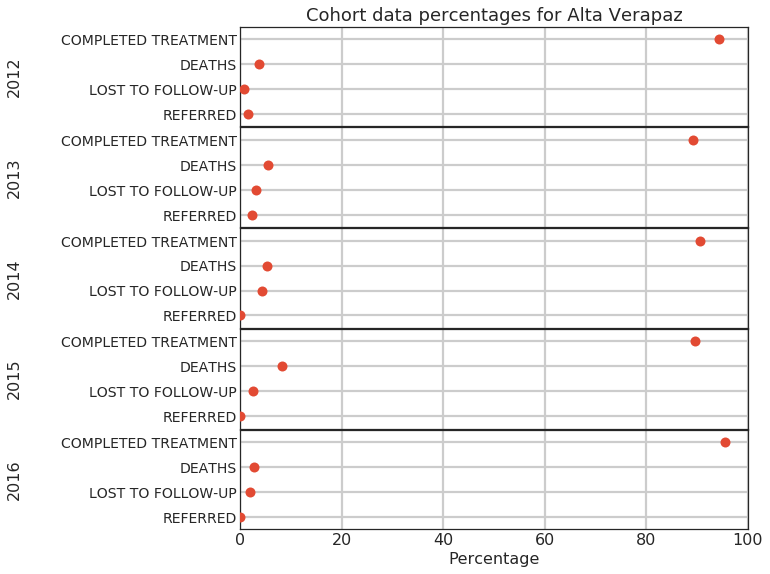

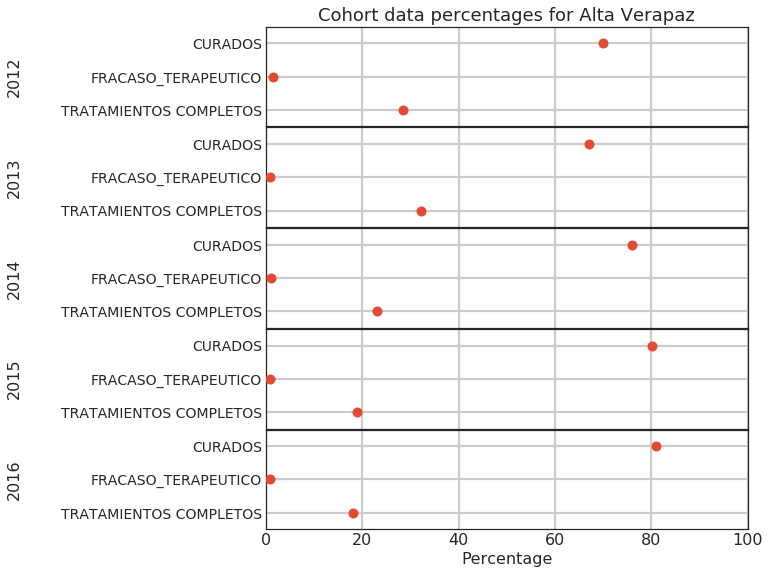

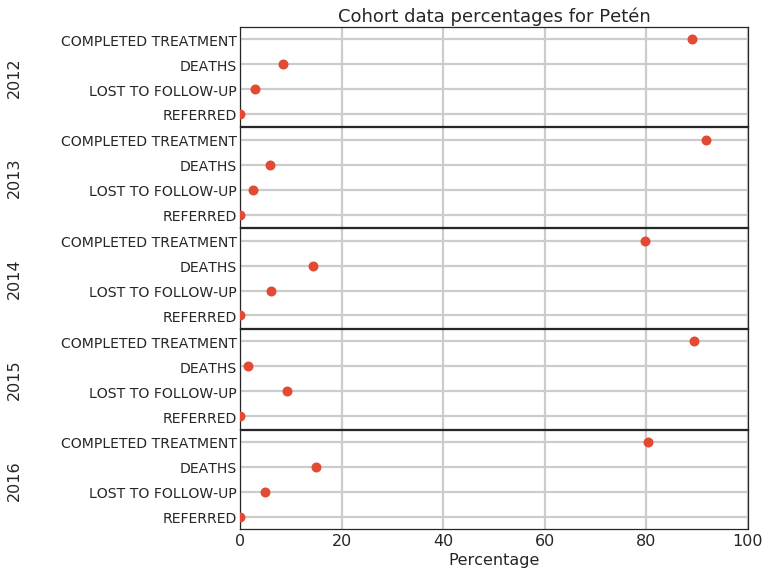

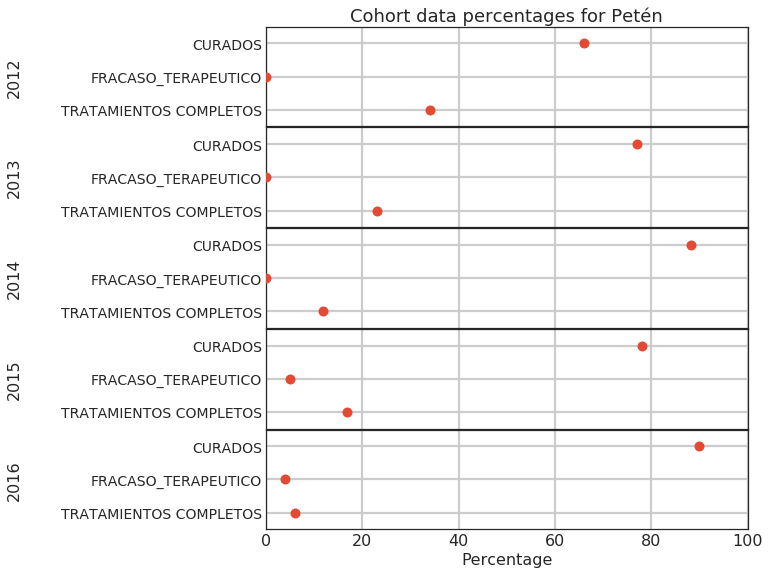

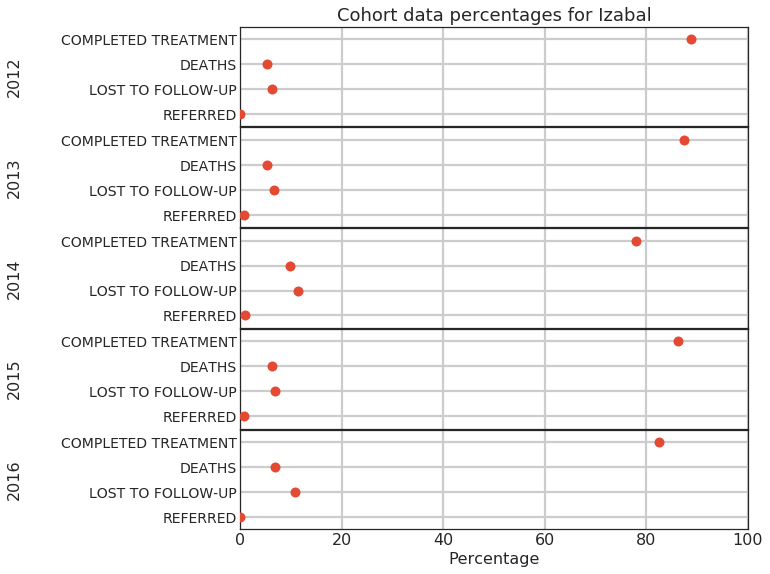

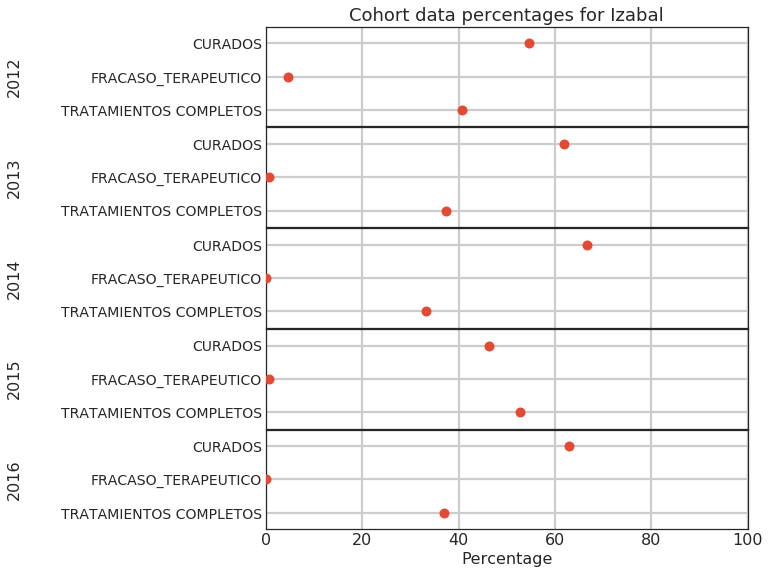

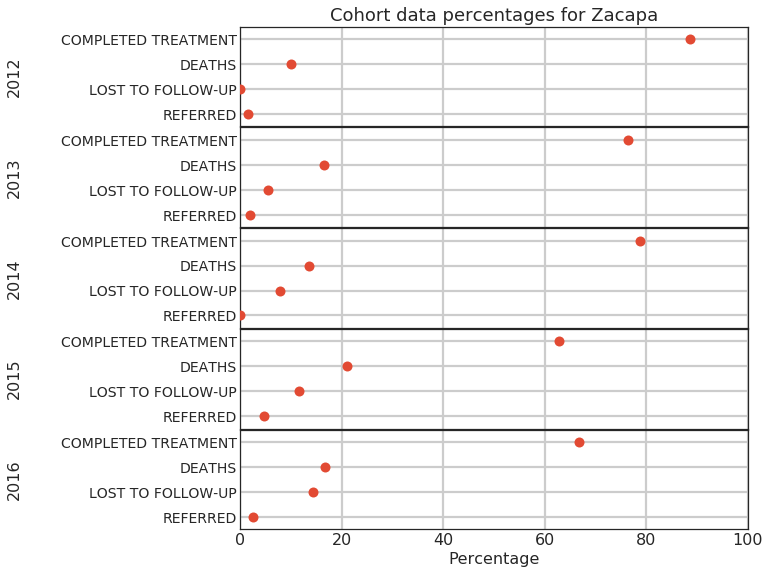

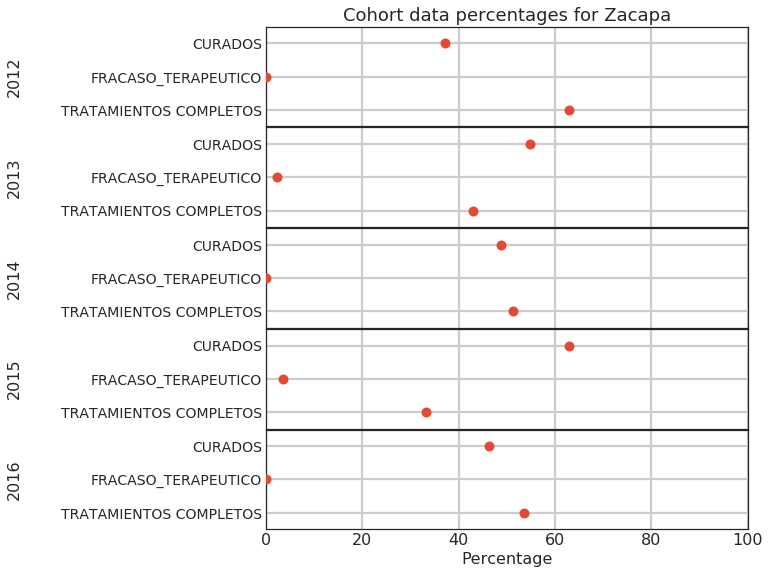

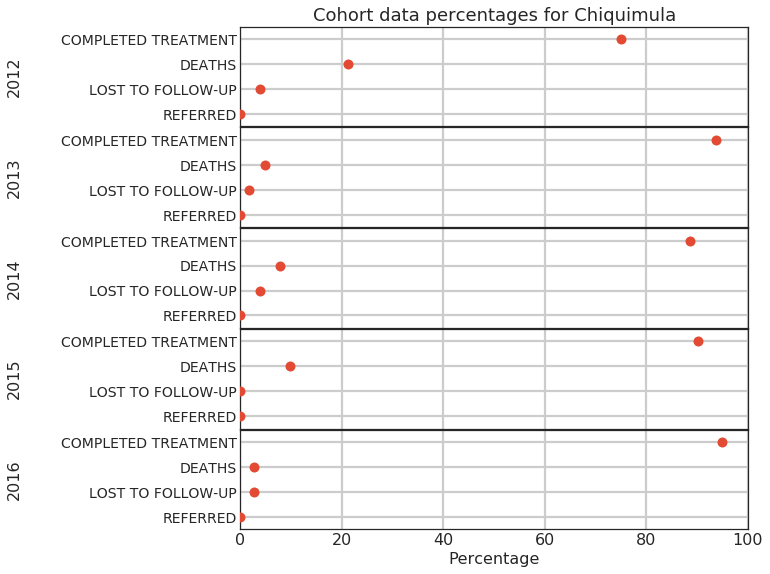

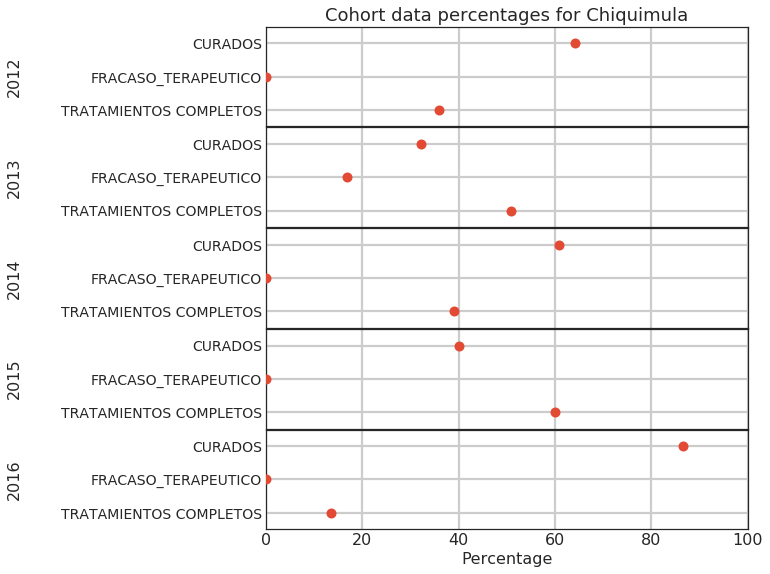

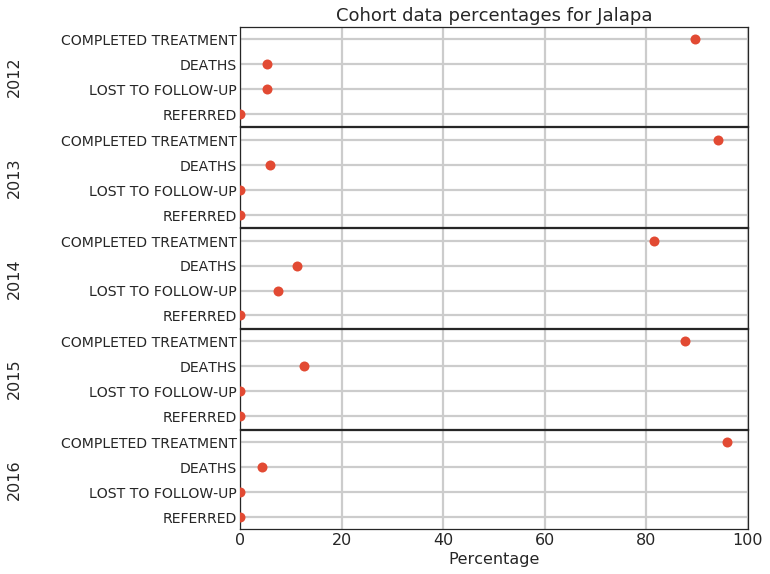

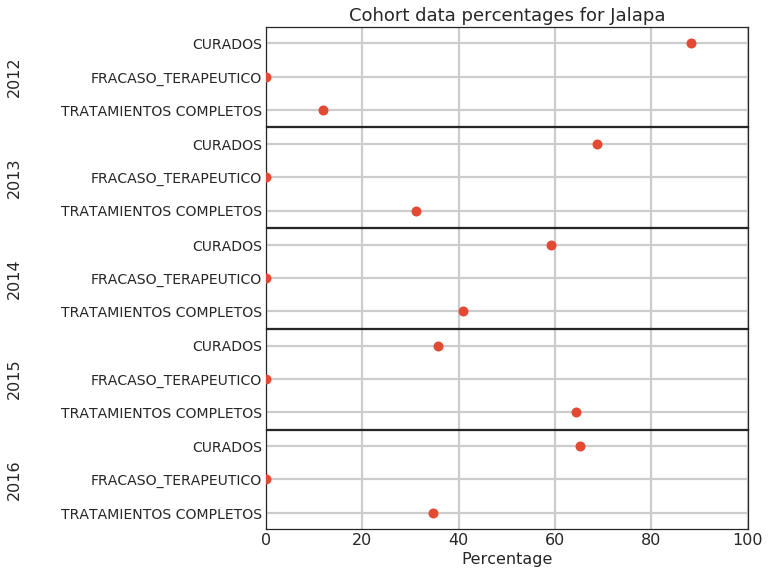

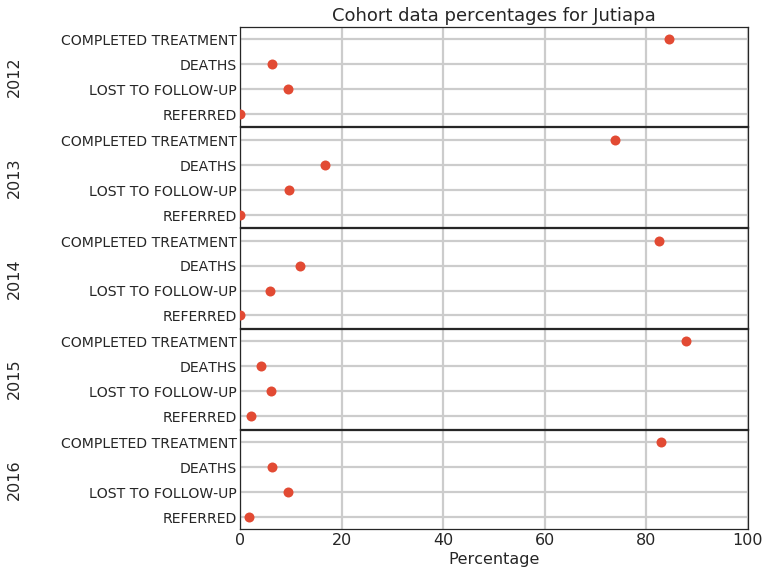

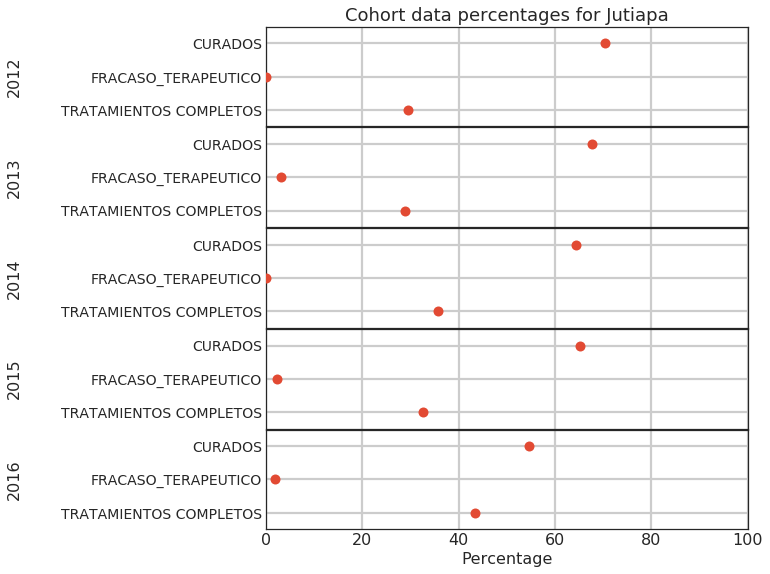

In [130]:
for depto in range(1, 23):
    
    deptoname = deptos.DEPARTAMEN[deptos.CODIGO == (str(depto * 100) if depto > 1 else "101")].values[0]
    print(depto, deptoname)
    grid, output = year_cohort_plot(data_filter = (datadf.deptocode==depto))
    grid.axes[0][0].set_title("Cohort data percentages for " + deptoname)
    with open("../../../../Graficas/TBCohortesDepto/Numbers-" + str(depto) + ".txt", mode = "w") as rawnumbers:
        rawnumbers.write(output)
    grid.savefig("../../../../Graficas/TBCohortesDepto/Figure-"+str(depto)+".png", format =  "png")
    grid, output = year_cohort_plot(groupby="row_name",
                                    data_filter = (datadf.deptocode==depto) & 
                                                  (datadf.row_name_B == "COMPLETED TREATMENT"))
    grid.axes[0][0].set_title("Cohort data percentages for " + deptoname)
    with open("../../../../Graficas/TBCohortesDepto_TxCompletos/Numbers-" + str(depto) + ".txt", mode = "w") as rawnumbers:
        rawnumbers.write(output)
    grid.savefig("../../../../Graficas/TBCohortesDepto_TxCompletos/Figure-"+str(depto)+".png", format =  "png")
plt.ion()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


Counts
row_name_B  COMPLETED TREATMENT  DEATHS  LOST TO FOLLOW-UP  REFERRED  total
year                                                                       
2012                      192.0    56.0               18.0       3.0  269.0
2013                      152.0    47.0               25.0       2.0  226.0
2014                      145.0    31.0               22.0       0.0  198.0
2015                      116.0    36.0               21.0       0.0  173.0
2016                      119.0    26.0               17.0       1.0  163.0
Percentages
row_name_B  COMPLETED TREATMENT  DEATHS  LOST TO FOLLOW-UP  REFERRED  total
year                                                                       
2012                       71.4    20.8                6.7       1.1  100.0
2013                       67.3    20.8               11.1       0.9  100.0
2014                       73.2    15.7               11.1       0.0  100.0
2015                       67.1    20.8               12.1       0.0 

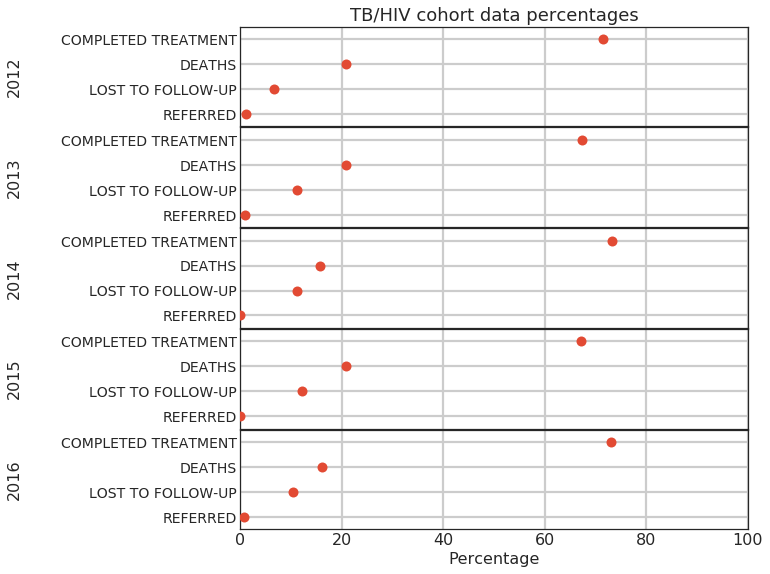

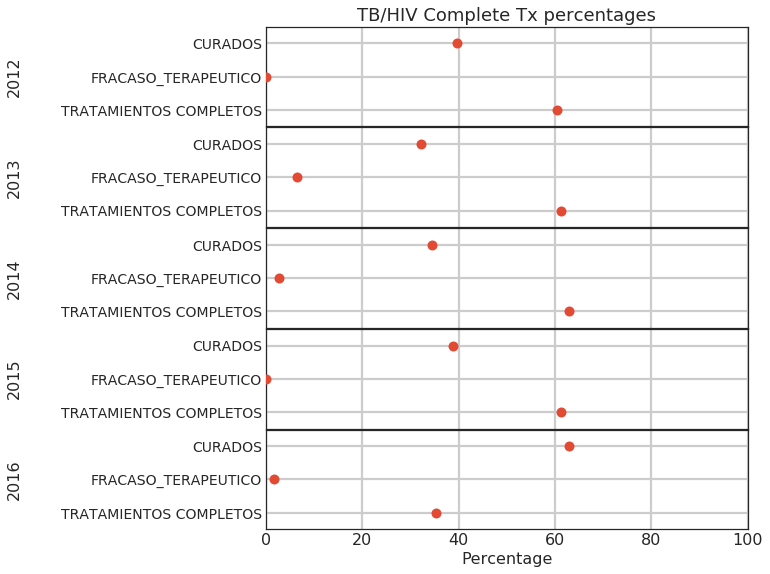

In [135]:
grid, output1 = year_cohort_plot(data_filter = (datadf.deptocode!=0) & (datadf.table == "Nuevos TB/VIH"))
grid.axes[0][0].set_title("TB/HIV cohort data percentages")

grid, output2 = year_cohort_plot(data_filter = (datadf.deptocode!=0) & (datadf.table == "Nuevos TB/VIH") &
                                (datadf.row_name_B == "COMPLETED TREATMENT"),
                               groupby = 'row_name')
grid.axes[0][0].set_title("TB/HIV Complete Tx percentages")

print(output1, "\n", output2)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


Counts
row_name_B  COMPLETED TREATMENT  DEATHS  LOST TO FOLLOW-UP  REFERRED   total
year                                                                        
2012                     3068.0   220.0              170.0      28.0  3486.0
2013                     2838.0   232.0              218.0      22.0  3310.0
2014                     2666.0   187.0              220.0       2.0  3075.0
2015                     2856.0   193.0              226.0       8.0  3283.0
2016                     2741.0   192.0              186.0      11.0  3130.0
Percentages
row_name_B  COMPLETED TREATMENT  DEATHS  LOST TO FOLLOW-UP  REFERRED  total
year                                                                       
2012                       88.0     6.3                4.9       0.8  100.0
2013                       85.7     7.0                6.6       0.7  100.0
2014                       86.7     6.1                7.2       0.1  100.0
2015                       87.0     5.9                6.9    

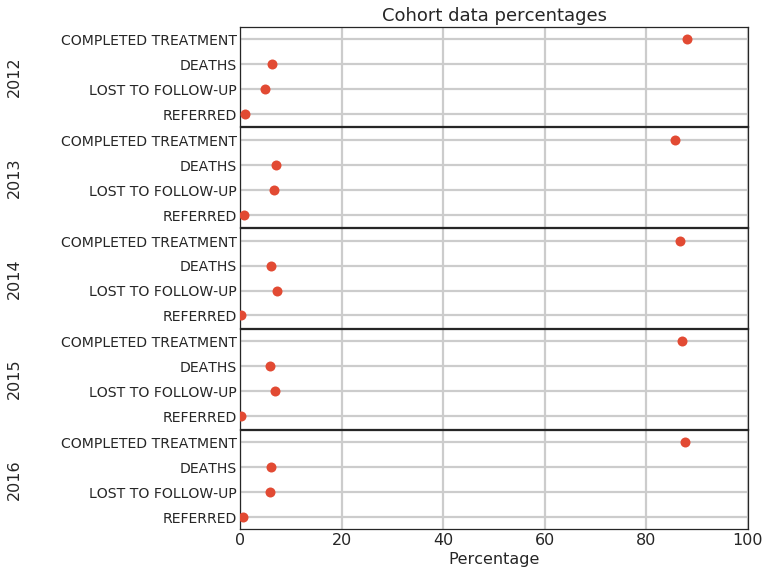

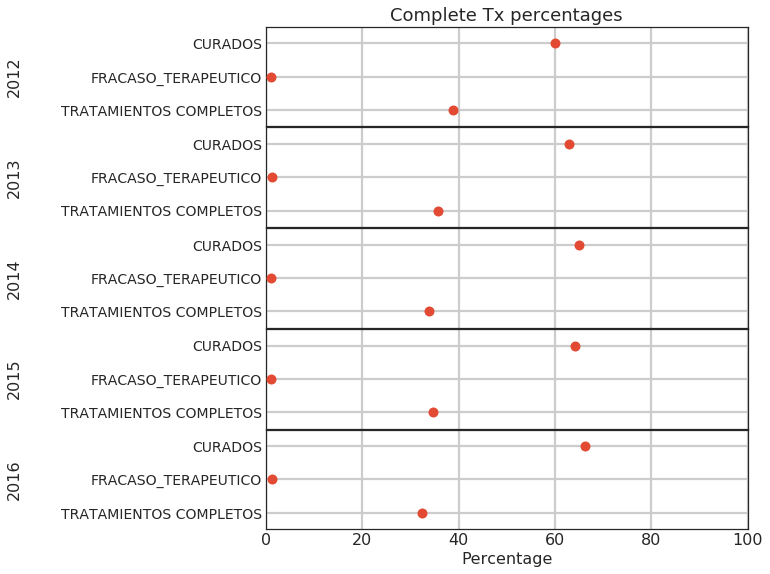

In [137]:
grid, output1 = year_cohort_plot(data_filter = (datadf.deptocode!=0))
grid.axes[0][0].set_title("Cohort data percentages")

grid, output2 = year_cohort_plot(data_filter = (datadf.deptocode!=0)  &
                                (datadf.row_name_B == "COMPLETED TREATMENT"),
                               groupby = 'row_name')
grid.axes[0][0].set_title("Complete Tx percentages")

print(output1, "\n", output2)

In [23]:
# Lets start with the missing basic data for pediatric and extrapulmonares cases: 
temp = datadf[#(datadf.row_name_.isin(["FALLECIDOS"])) & 
              (datadf.col_name.isin(["TOTAL"])) & 
       (datadf.table.isin(["Nuevos Pulmonares BK+", "Nuevos Pulmonares BK-", "Nuevos Pediatricos", 
                          "Nuevos Extrapulmonares", "Nuevos TB/VIH", "Retratamiento"
                          ])) &
       (datadf.deptocode!=0)].\
    groupby(["year", "row_name"]).value.sum().unstack(1)
#temp["total"] = temp.sum(axis=1)
#temp = temp.fillna(0)
#temp = \
#    (np.round(temp.divide(temp.total , axis="rows")*100, decimals=0)).astype(int).astype(str) + "%"
temp["total"] = temp.sum(axis=1)
temp["fatr"] = temp.FALLECIDOS / temp.total*100

(0, 10)

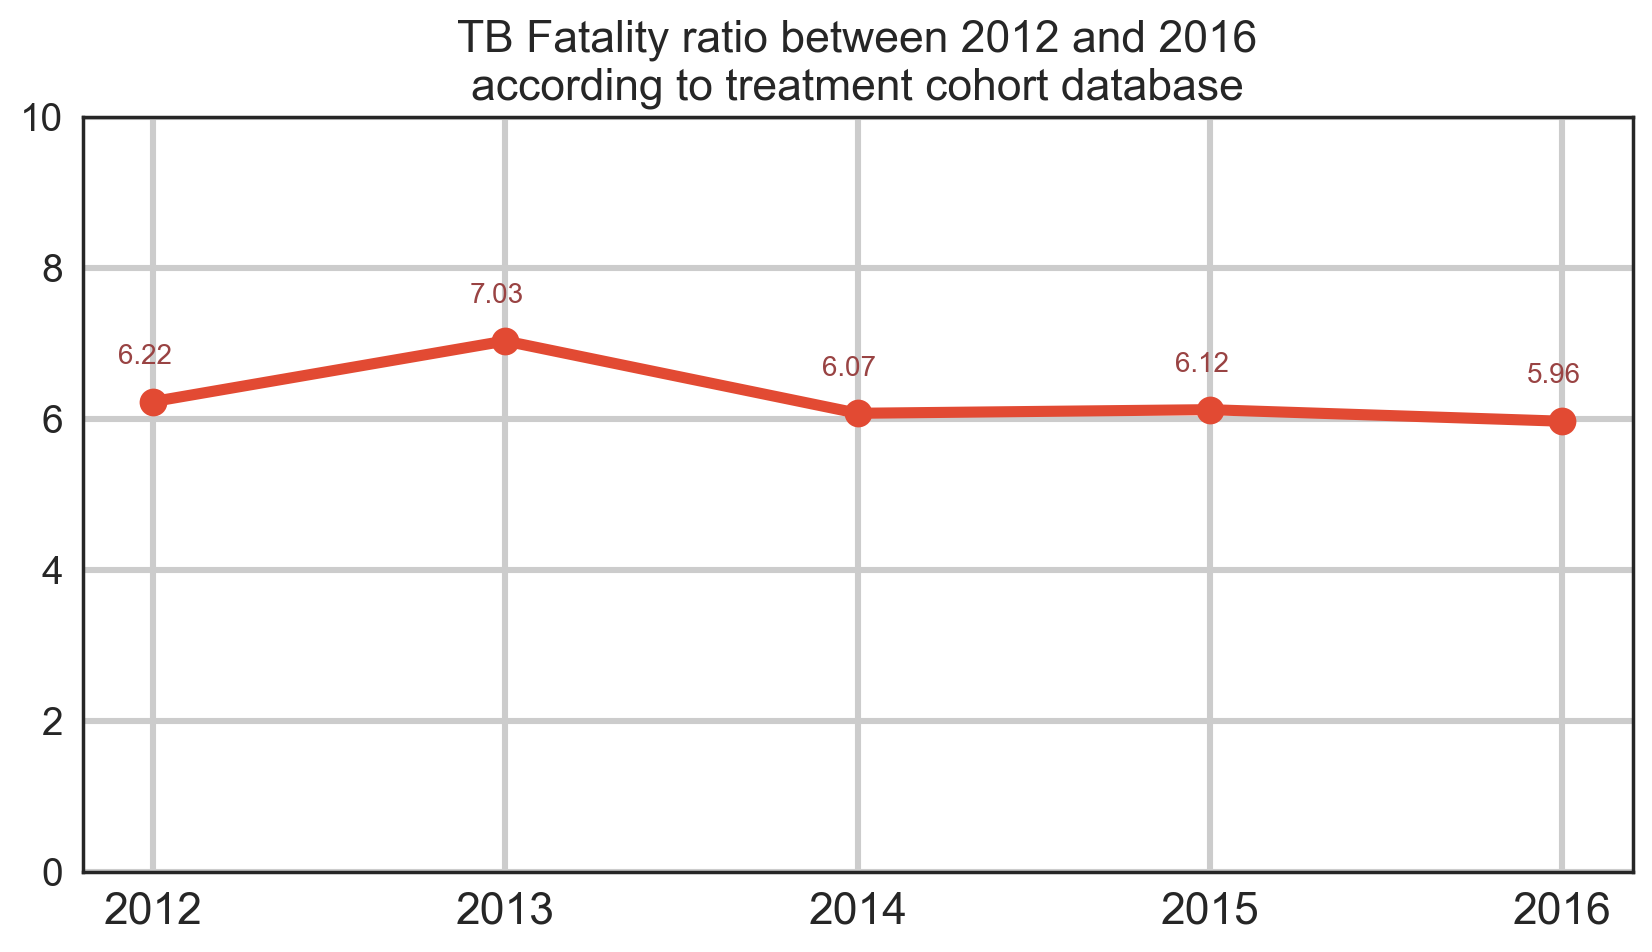

In [62]:
plt.rcParams["figure.figsize"] = 10,5
plt.rcParams["lines.linewidth"] = 4
plt.rcParams["lines.markersize"] = 10
plt.plot(temp.index.astype(str), temp.fatr, marker="o")
plt.title("TB Fatality ratio between 2012 and 2016\naccording to treatment cohort database")
i = 0
for ix, row in temp.iterrows():
    plt.text(i-0.1, row.fatr+0.5, str(round(row.fatr, 2) ), color="#994343", fontsize=10)
    i+= 1
plt.ylim(0,10)

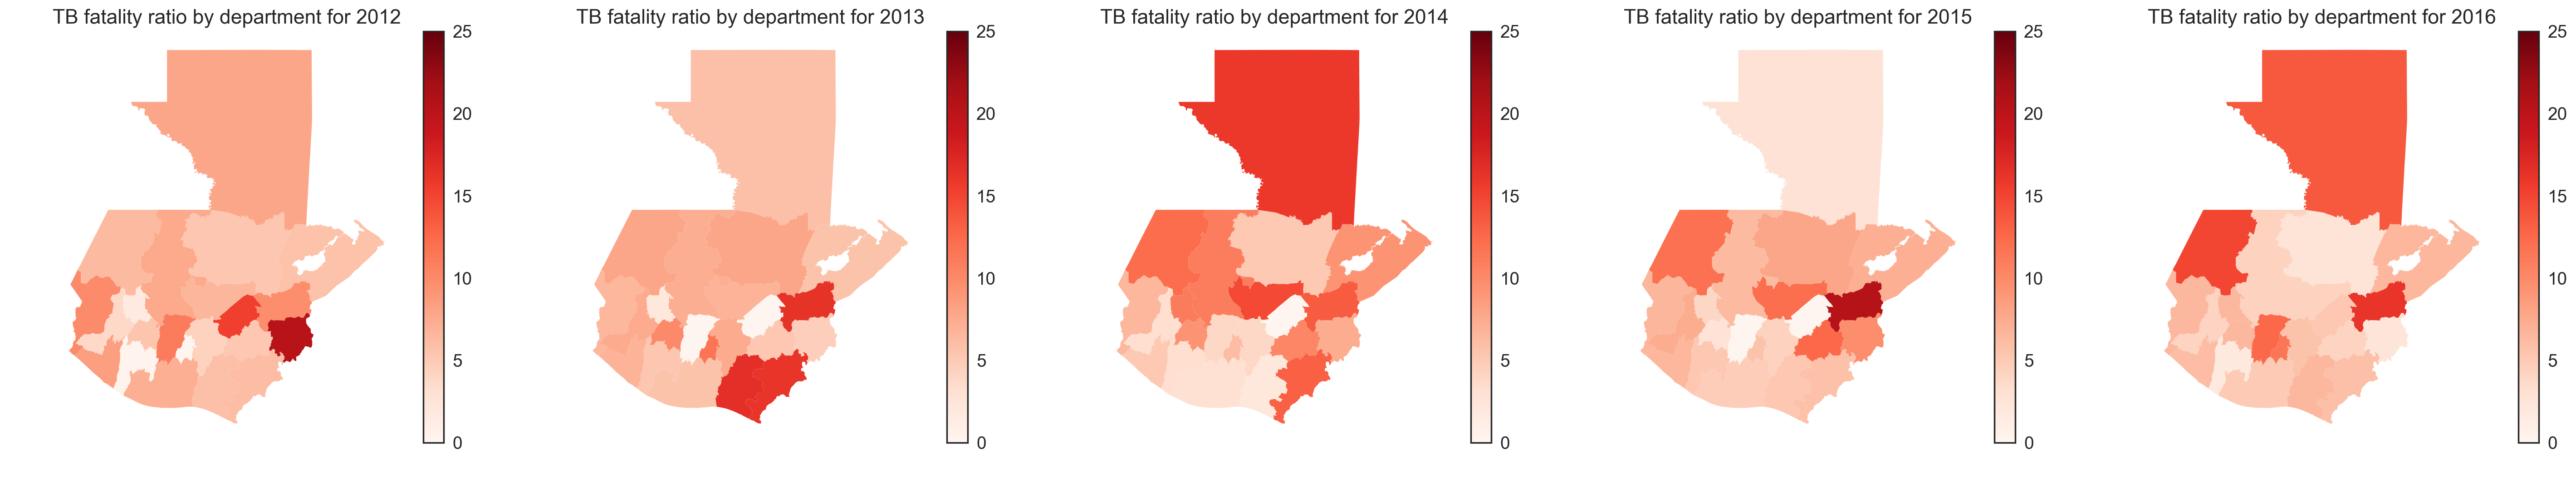

In [112]:
temp = datadf[(datadf.col_name.isin(["TOTAL"])) & 
       (datadf.table.isin([
           "Nuevos Pulmonares BK+", "Nuevos Pulmonares BK-", "Nuevos Pediatricos", 
           "Nuevos Extrapulmonares", 
           "Nuevos TB/VIH", "Retratamiento"])) &
       (datadf.deptocode!=0) & (datadf.year.isin([2012, 2013, 2014, 2015, 2016]))].\
    groupby(["deptocode", "year", "row_name_B"]).value.sum().unstack(2)
temp["total"] = temp.sum(axis=1)
temp = temp.fillna(0)
temp2 = \
    (np.round(temp.divide(temp["total"] , axis="rows")*100, decimals=2)).reset_index()

temp2["deptocode"]= (temp2.deptocode * 100).astype(str).apply(lambda x: "101" if x=="100" else x)
#temp = temp.stack().reset_index()[lambda x: x["row_name_"] != "total"]

side = 6
n = 5
vmin = 0
vmax = 25
f, axes = plt.subplots(1, n, figsize=(side*n*1.2, side))
i = 2012
for ax in axes:
    temp = deptos.merge(temp2[temp2.year == i].reset_index(), 
                 left_on="CODIGO", right_on = "deptocode" )
    temp.plot("DEATHS", cmap = "Reds", legend=True, ax= ax, vmin = vmin, vmax = vmax)
    ax.axis('off')
    ax.set_title("TB fatality ratio by department for "+ str(i))
    i += 1

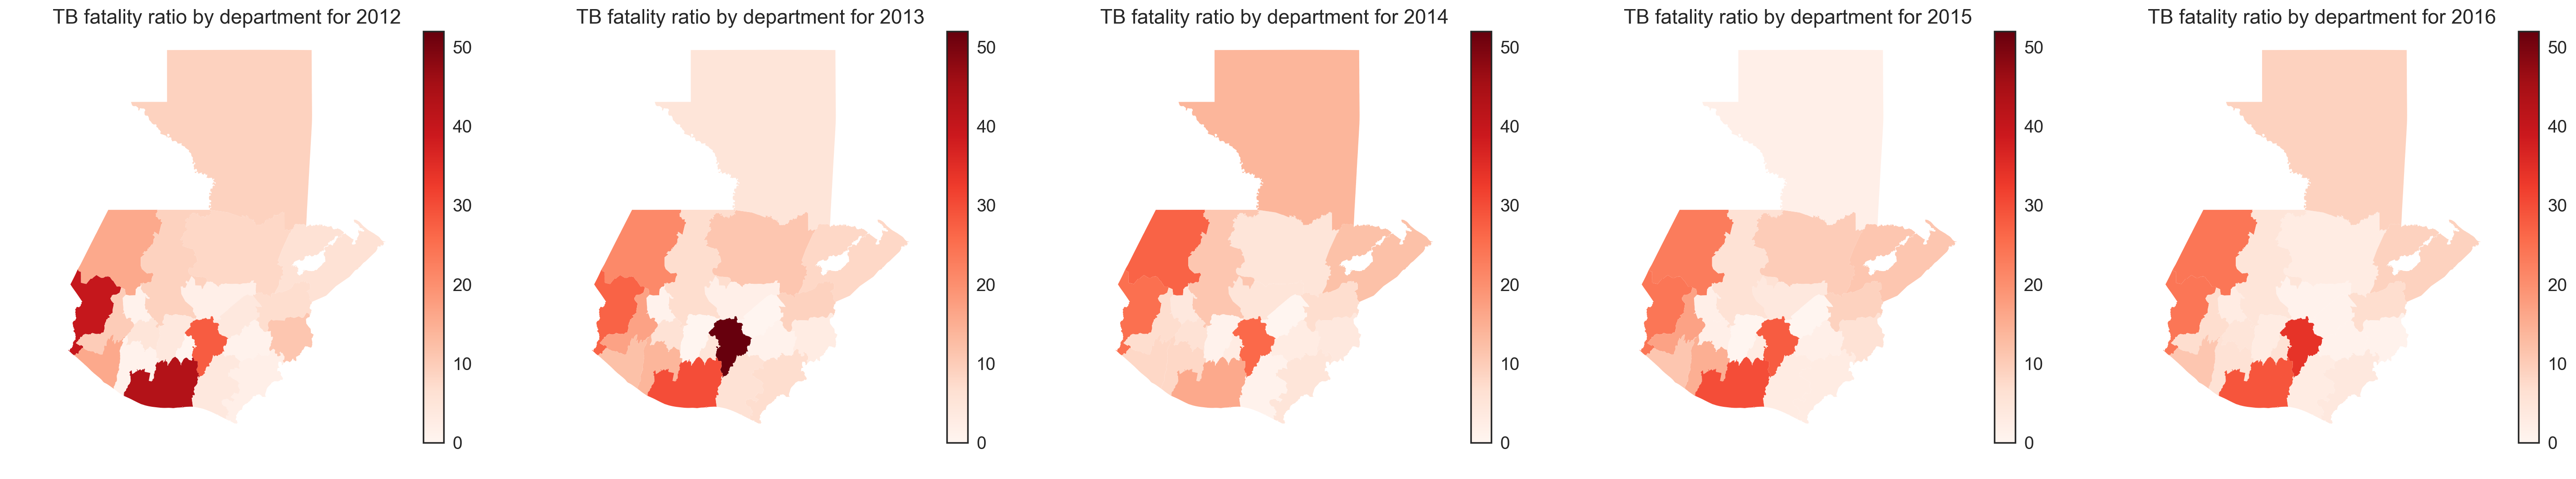

In [116]:
temp = datadf[(datadf.col_name.isin(["TOTAL"])) & 
       (datadf.table.isin([
           "Nuevos Pulmonares BK+", "Nuevos Pulmonares BK-", "Nuevos Pediatricos", 
           "Nuevos Extrapulmonares", 
           "Nuevos TB/VIH", "Retratamiento"])) &
       (datadf.deptocode!=0) & (datadf.year.isin([2012, 2013, 2014, 2015, 2016]))].\
    groupby(["deptocode", "year", "row_name_B"]).value.sum().unstack(2)
temp["total"] = temp.sum(axis=1)
temp = temp.fillna(0)

temp = temp.reset_index()
temp["deptocode"]= (temp.deptocode * 100).astype(str).apply(lambda x: "101" if x=="100" else x)

side = 6
n = 5
vmin = 0
vmax = temp.DEATHS.max()
f, axes = plt.subplots(1, n, figsize=(side*n*1.2, side))
i = 2012
for ax in axes:
    temp3 = deptos.merge(temp[temp.year == i].reset_index(), 
                 left_on="CODIGO", right_on = "deptocode" )
    temp3.plot("DEATHS", cmap = "Reds", legend=True, ax= ax, vmin = vmin, vmax = vmax)
    ax.axis('off')
    ax.set_title("TB fatality ratio by department for "+ str(i))
    i += 1

In [117]:
vmax

52.0